In [302]:
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

In [303]:
def concat_df(train_data, test_data):
    return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

def divide_df(all_data):
    return all_data.loc[:890], all_data.loc[891:].drop(['Survived'], axis=1)

df_train = pd.read_csv('./train-1.csv')
df_test = pd.read_csv('./test-1.csv')
df_all = concat_df(df_train, df_test)

df_train.name = 'Training Set'
df_test.name = 'Test Set'
df_all.name = 'All Set'

dfs = [df_train, df_test]

print('Number of Training Examples = {}'.format(df_train.shape[0]))
print('Number of Test Examples = {}\n'.format(df_test.shape[0]))
print('Training X Shape = {}'.format(df_train.shape))
print('Training y Shape = {}\n'.format(df_train['Survived'].shape[0]))
print('Test X Shape = {}'.format(df_test.shape))
print('Test y Shape = {}\n'.format(df_test.shape[0]))
print(df_train.columns)
print(df_test.columns)
print(df_train.info())
print(df_train.describe())
df_train.sample(5)

Number of Training Examples = 891
Number of Test Examples = 418

Training X Shape = (891, 12)
Training y Shape = 891

Test X Shape = (418, 11)
Test y Shape = 418

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
197,198,0,3,"Olsen, Mr. Karl Siegwart Andreas",male,42.0,0,1,4579,8.4042,NaN,S
781,782,1,1,"Dick, Mrs. Albert Adrian (Vera Gillespie)",female,17.0,1,0,17474,57.0000,B20,S
708,709,1,1,"Cleaver, Miss. Alice",female,22.0,0,0,113781,151.5500,NaN,S
508,509,0,3,"Olsen, Mr. Henry Margido",male,28.0,0,0,C 4001,22.5250,NaN,S
273,274,0,1,"Natsch, Mr. Charles H",male,37.0,0,1,PC 17596,29.7000,C118,C


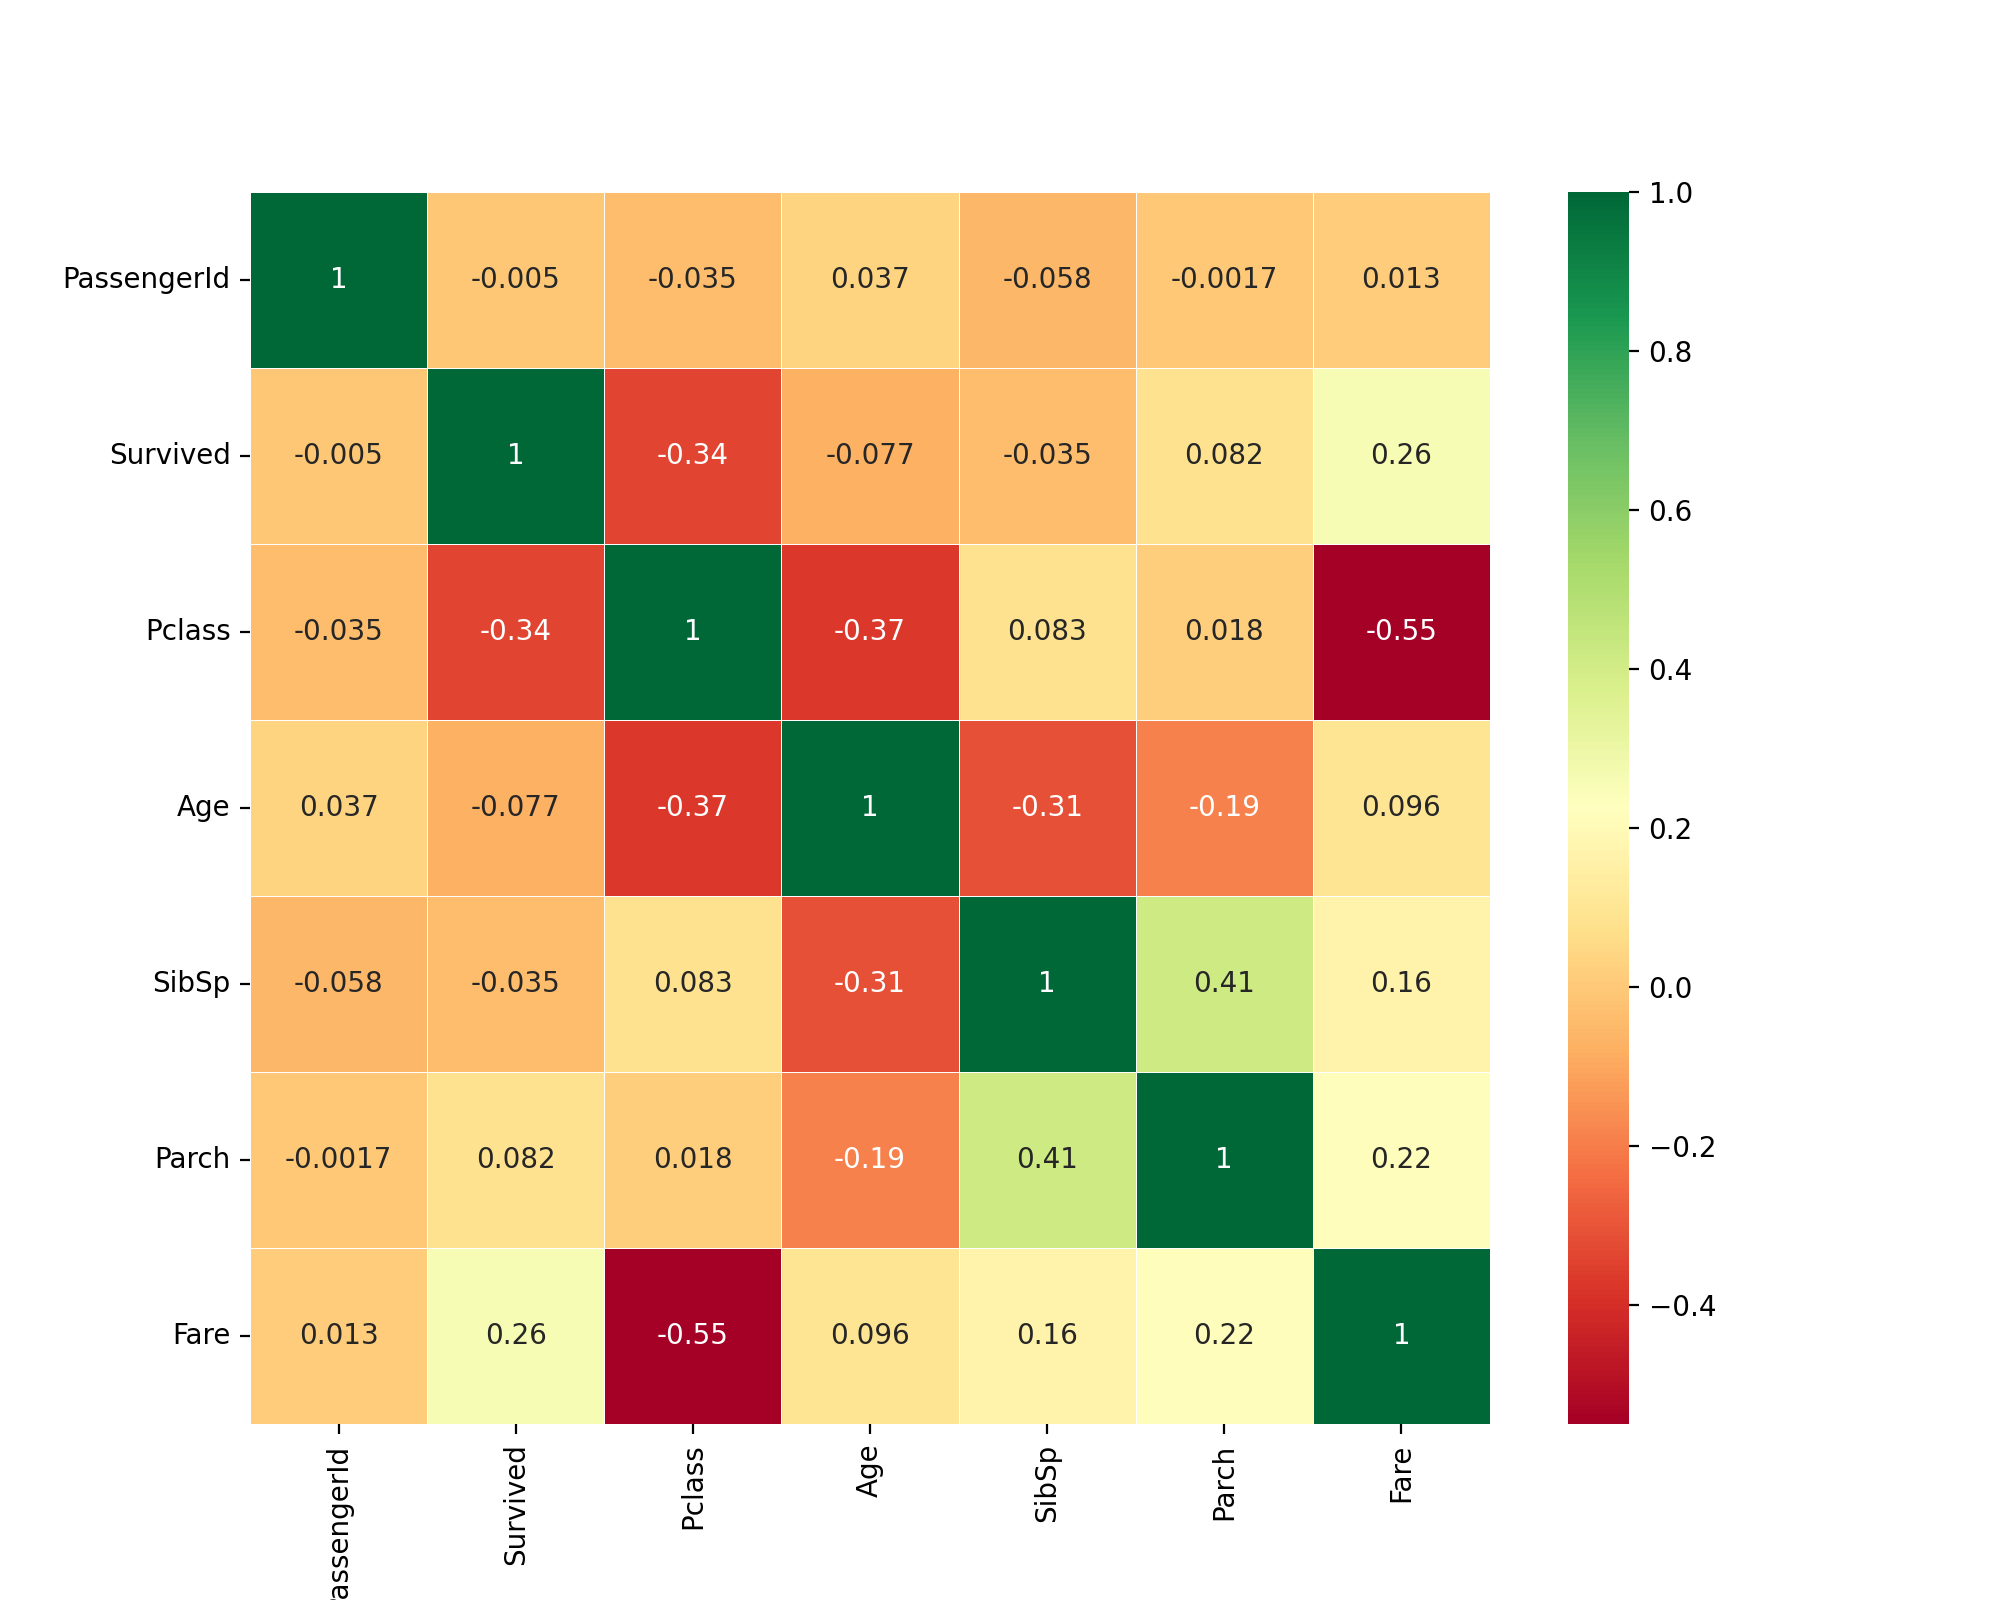

In [304]:
df_train_numeric = df_train.select_dtypes(include='number')
sns.heatmap(df_train_numeric.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [305]:
# Nessa função ele analisará cada coluna do dataframe obtida acima:
def display_missing(df):
    for col in df.columns.tolist():
        print('{} column missing values: {}'.format(col, df[col].isnull().sum()))
    print('\n')

for df in dfs:
    print('{}'.format(df.name))
    display_missing(df)

Training Set
PassengerId column missing values: 0
Survived column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 177
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 0
Cabin column missing values: 687
Embarked column missing values: 2


Test Set
PassengerId column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 86
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 1
Cabin column missing values: 327
Embarked column missing values: 0




In [306]:
df_train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [307]:
df_train['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [308]:
# ALtera números para string
df_train['Pclass'] = df_train['Pclass'].astype('str')

pd.crosstab(df_train.Pclass,df_train.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


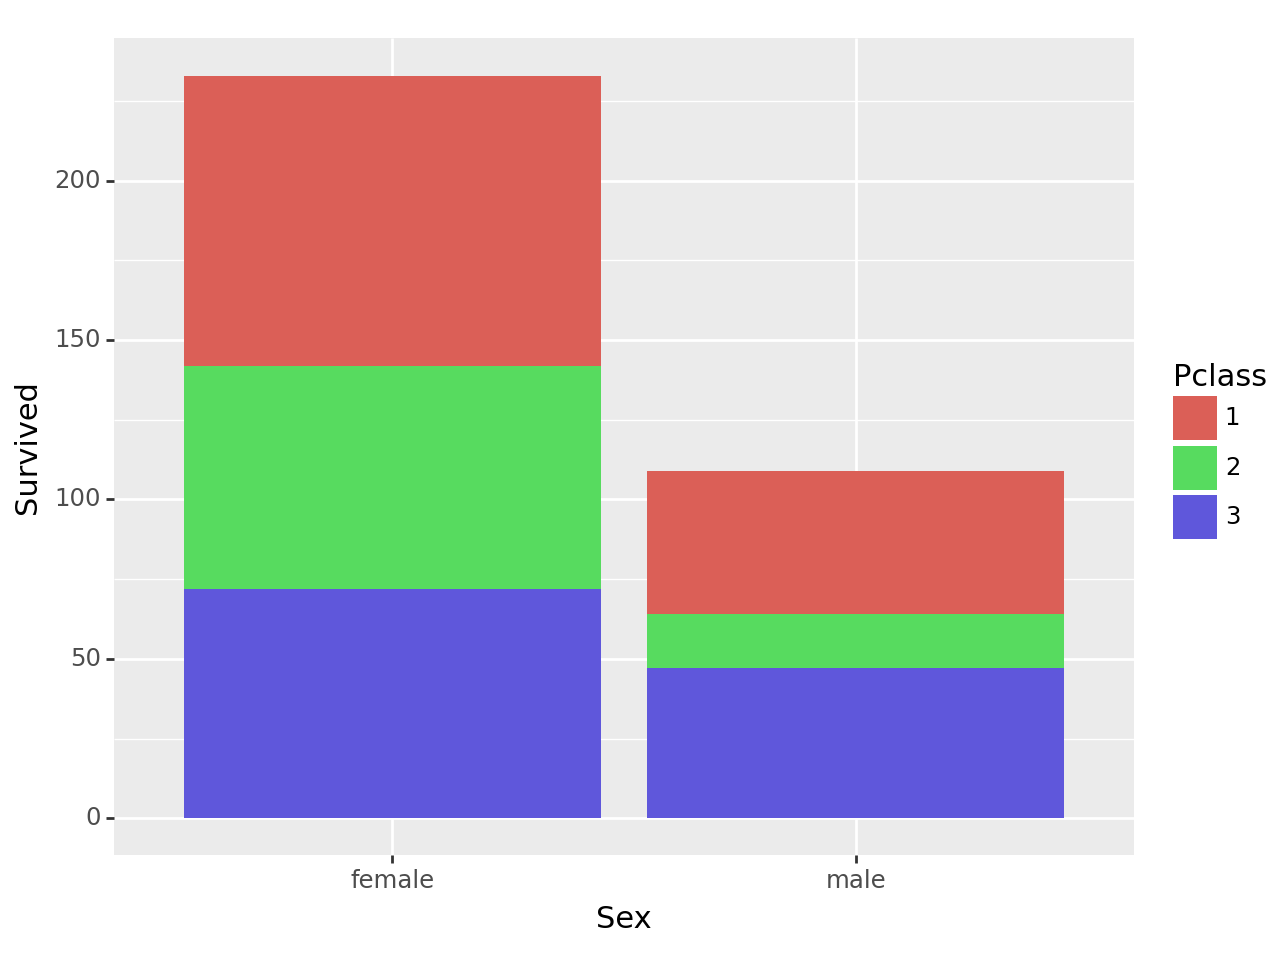

<Figure Size: (640 x 480)>

In [309]:

(ggplot(df_train)
 + aes(x='Sex', y='Survived', fill='Pclass')
 + geom_col()
)

In [310]:
df_train['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [311]:
df_train[["Age", "Survived"]].groupby(['Age'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Age,Survived
0,0.42,1.0
9,5.00,1.0
79,63.00,1.0
68,53.00,1.0
1,0.67,1.0
...,...,...
37,28.50,0.0
49,36.50,0.0
46,34.50,0.0
26,20.50,0.0


In [312]:
train_dropna_age = df_train['Age'].dropna()

/home/vinicius/.local/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 177 rows containing missing values.


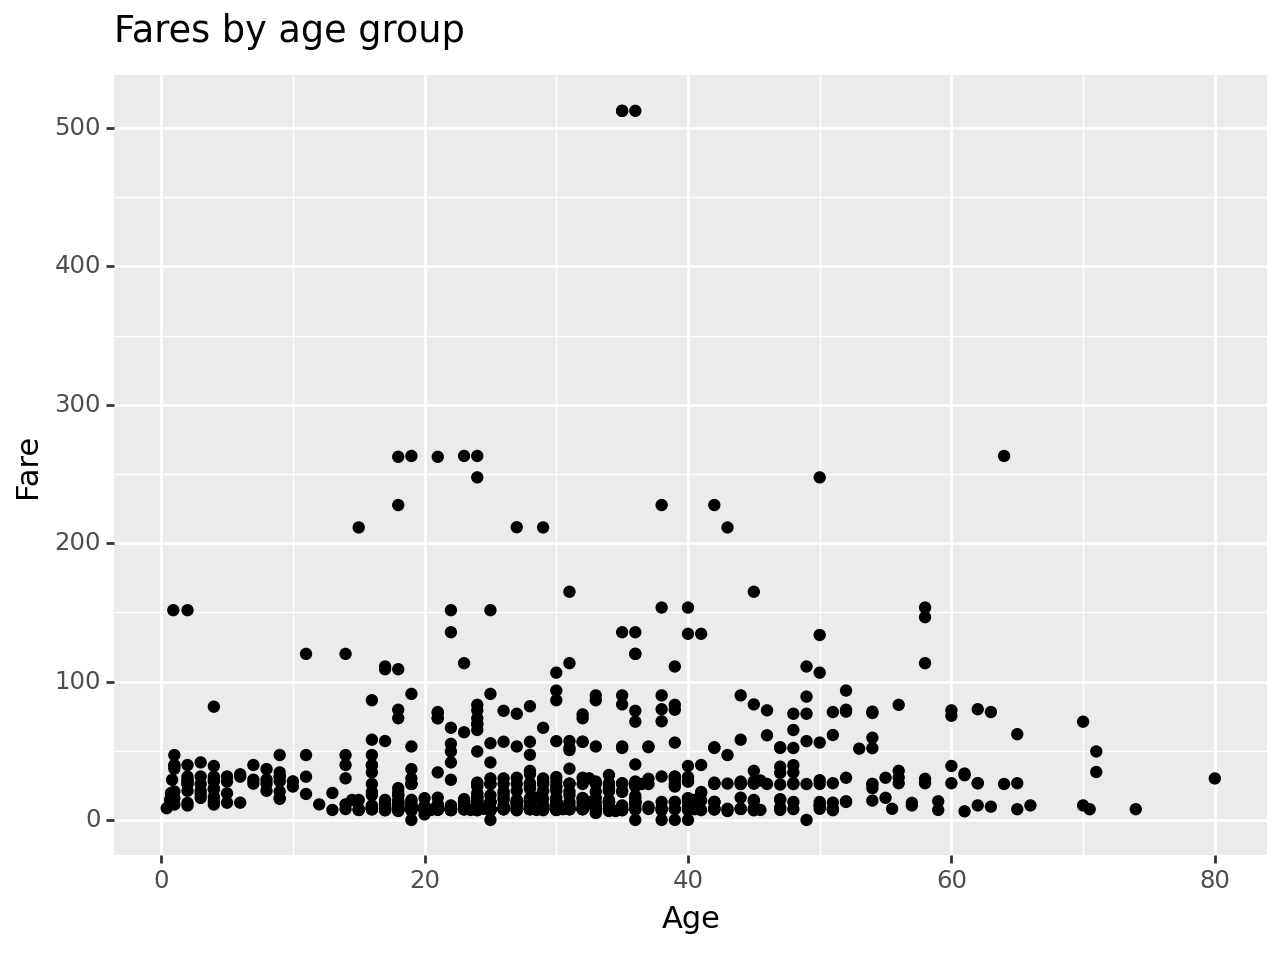

<Figure Size: (640 x 480)>

In [313]:
(ggplot(df_train)
 + aes(x='Age', y='Fare')
 + geom_point()
 + ggtitle('Fares by age group')
)

/home/vinicius/.local/lib/python3.10/site-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/home/vinicius/.local/lib/python3.10/site-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/home/vinicius/.local/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 177 rows containing missing values.


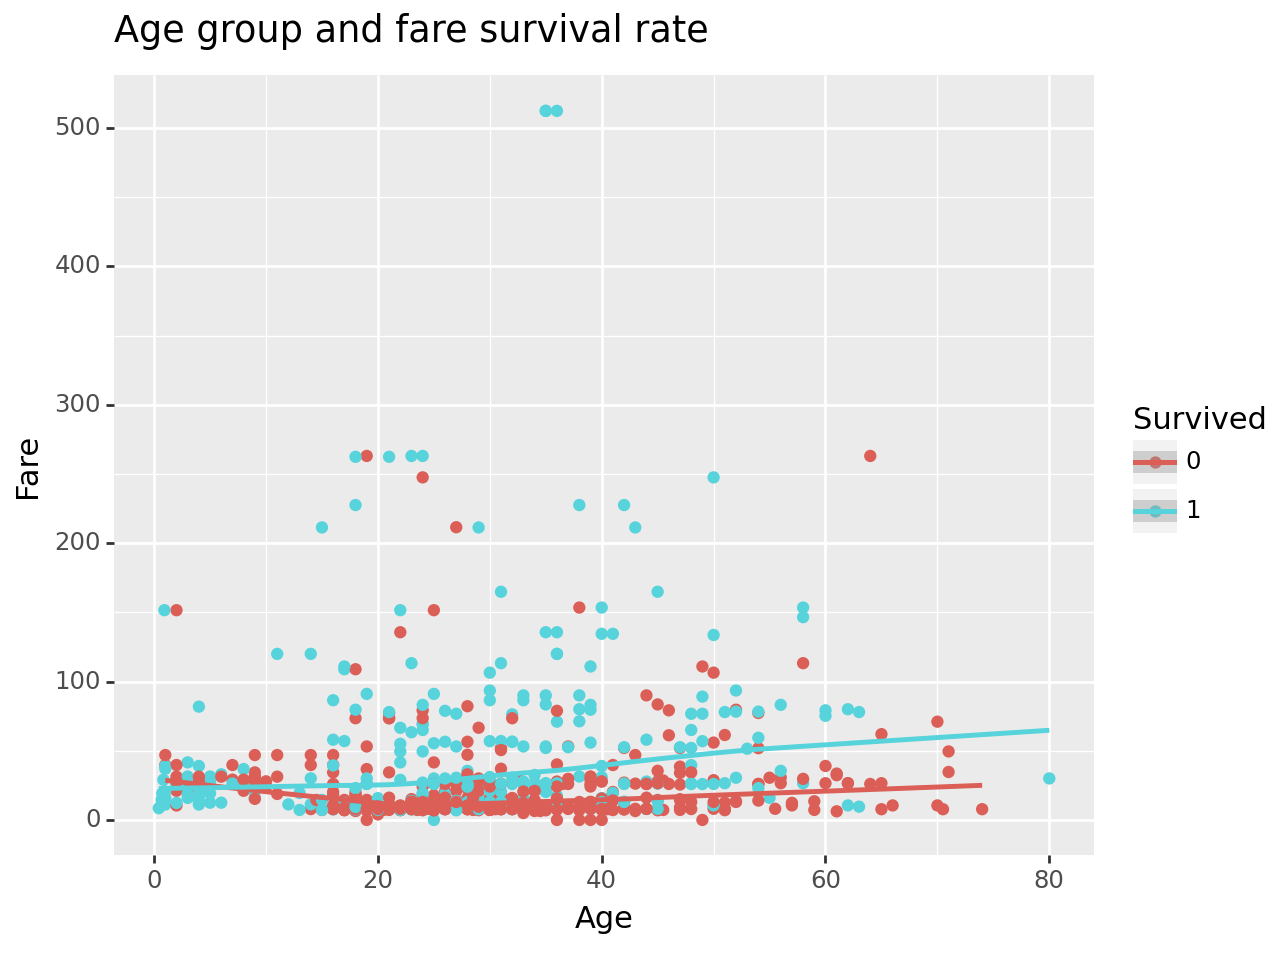

<Figure Size: (640 x 480)>

In [314]:
df_train['Survived'] = df_train['Survived'].astype('category')

(ggplot(df_train)
 + aes(x='Age', y='Fare', color='Survived')
 + geom_point()
 + stat_smooth()
 + ggtitle('Age group and fare survival rate')
)

/home/vinicius/.local/lib/python3.10/site-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/home/vinicius/.local/lib/python3.10/site-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/home/vinicius/.local/lib/python3.10/site-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/home/vinicius/.local/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 177 rows containing missing values.


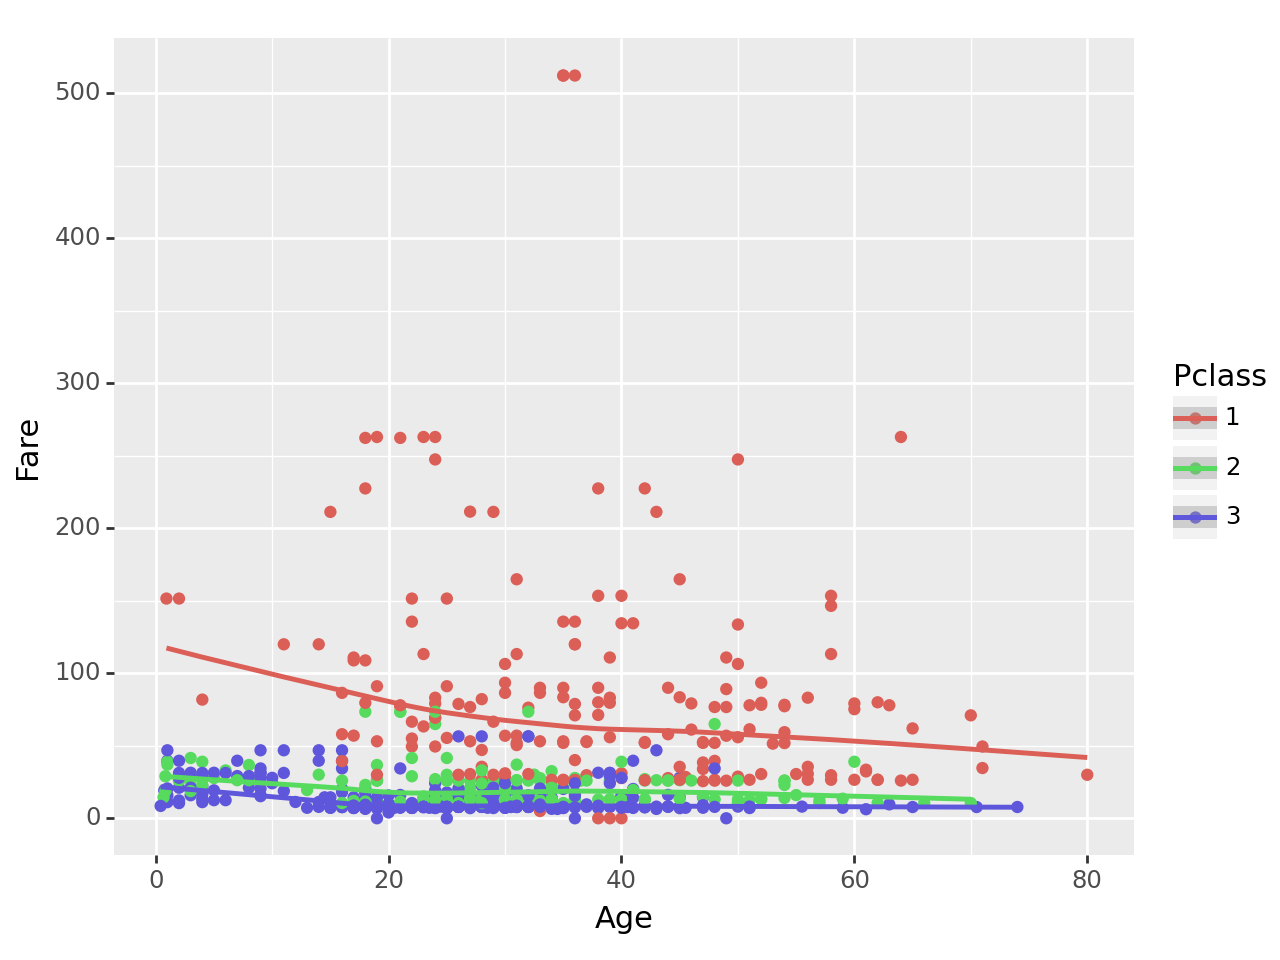

<Figure Size: (640 x 480)>

In [315]:
# Aqui iremos procurar a correlação entre idade e a classe dos passageiros:
(ggplot(df_train)
 + aes(x='Age', y='Fare', color='Pclass')
 + geom_point()
 + stat_smooth()
)

In [316]:
df_train['Survived'] = df_train['Survived'].astype('category')

/home/vinicius/.local/lib/python3.10/site-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/home/vinicius/.local/lib/python3.10/site-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/home/vinicius/.local/lib/python3.10/site-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/home/vinicius/.local/lib/python3.10/site-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/home/vinicius/.local/lib/python3.10/site-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/home/vinicius/.local/lib/python3.10/site-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowes

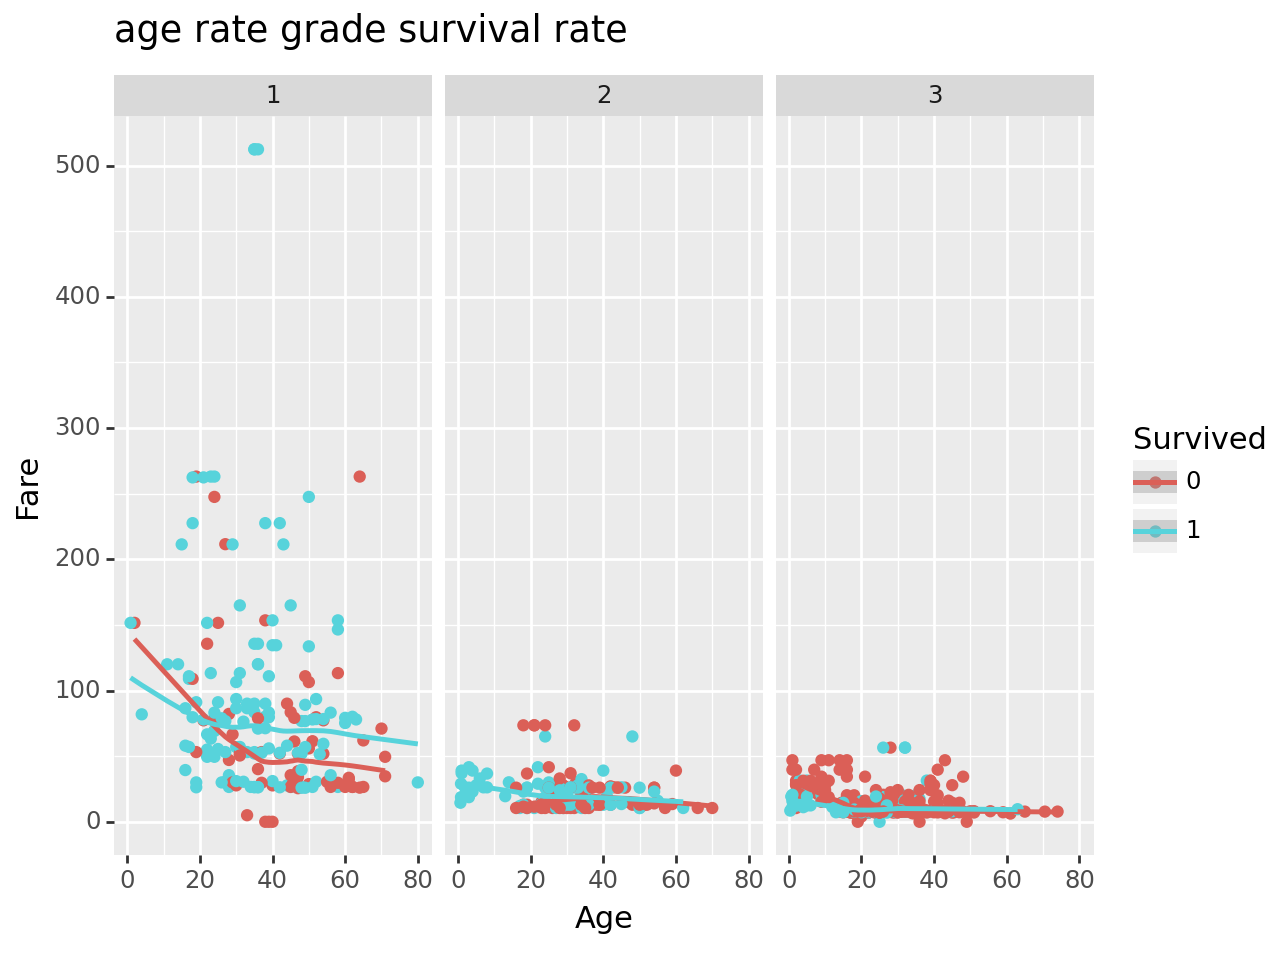

<Figure Size: (640 x 480)>

In [317]:
# Busca correlação entre idade e sexo da tarifa
(ggplot(df_train)
 + aes(x='Age', y='Fare', color='Survived')
 + geom_point()
 + stat_smooth()
 + facet_wrap('~Pclass')
 + ggtitle('age rate grade survival rate')
)

/home/vinicius/.local/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 177 rows containing missing values.


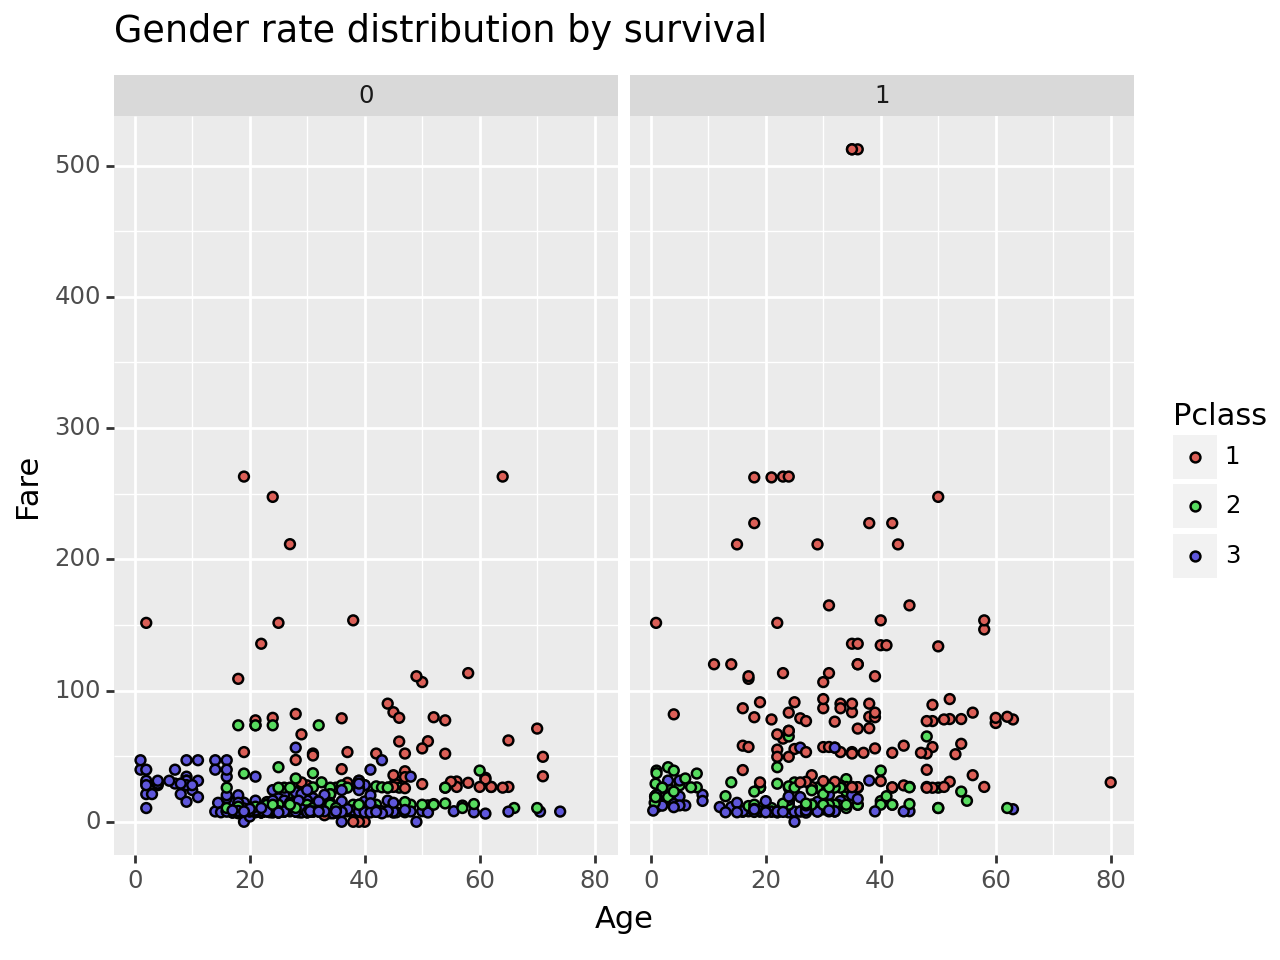

<Figure Size: (640 x 480)>

In [318]:
(ggplot(df_train)
 + aes(x='Age', y='Fare', fill='Pclass')
 + geom_point()
 + ggtitle('Gender rate distribution by survival')
 + facet_wrap('~Survived')
)

/home/vinicius/.local/lib/python3.10/site-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/home/vinicius/.local/lib/python3.10/site-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/home/vinicius/.local/lib/python3.10/site-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/home/vinicius/.local/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 177 rows containing missing values.


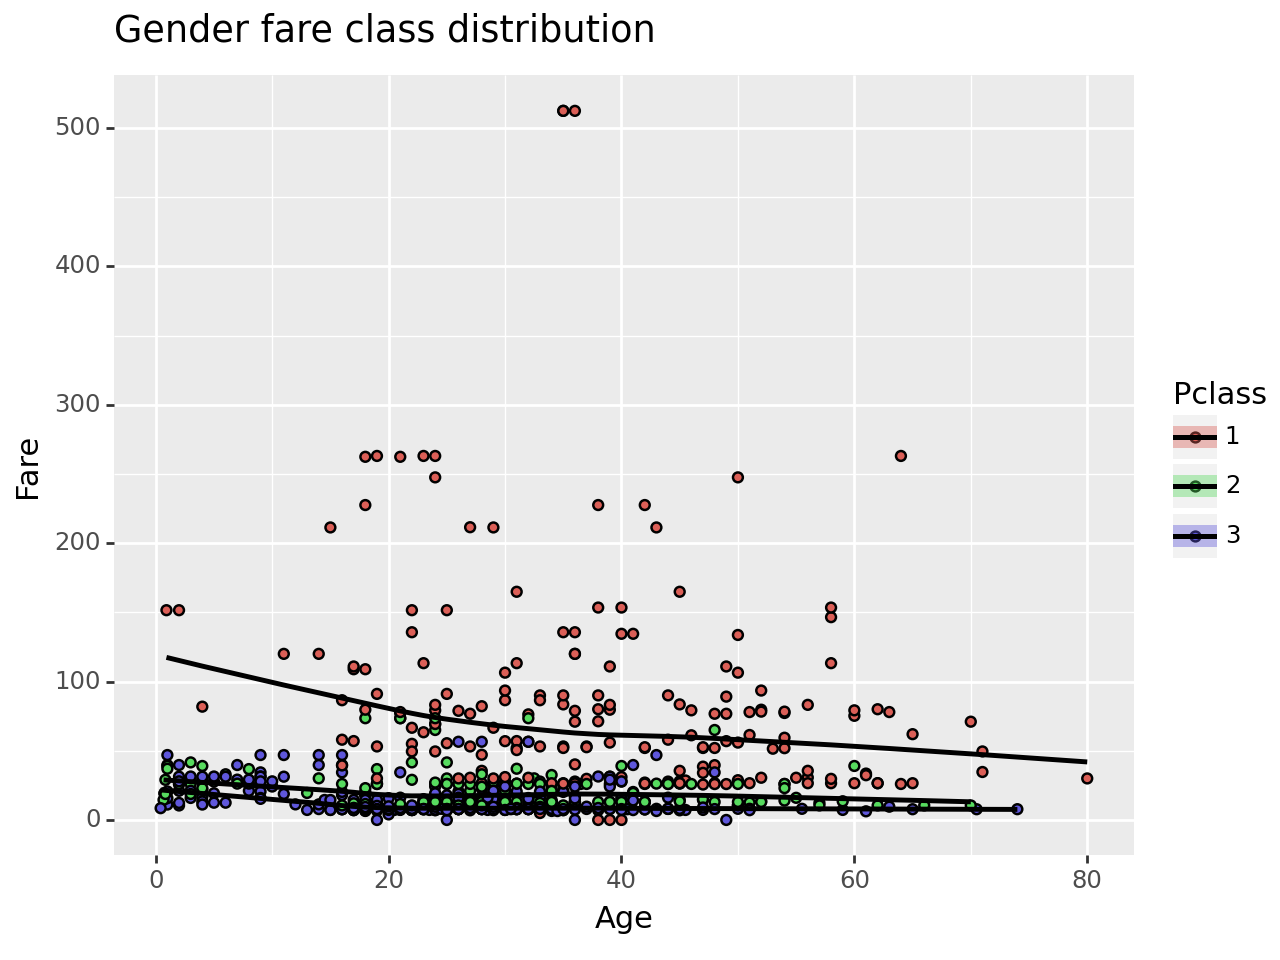

<Figure Size: (640 x 480)>

In [319]:
(ggplot(df_train)
 + aes(x='Age', y='Fare', fill='Pclass')
 + geom_point()
 + stat_smooth()
 + ggtitle('Gender fare class distribution')
)

/home/vinicius/.local/lib/python3.10/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 177 rows containing non-finite values.


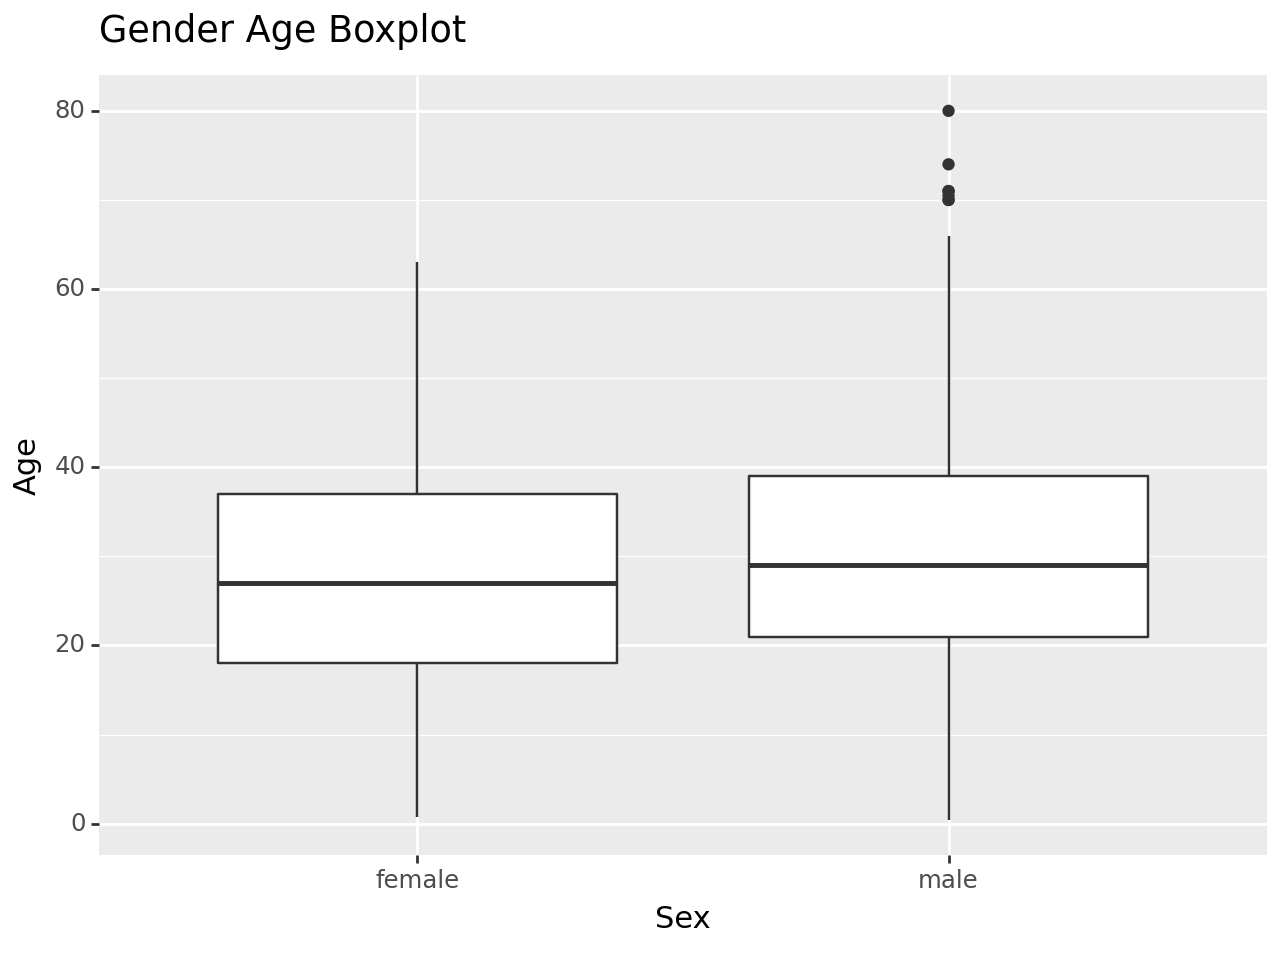

<Figure Size: (640 x 480)>

In [320]:
(ggplot(df_train)
 + aes(x='Sex', y='Age')
 + geom_boxplot()
 + ggtitle('Gender Age Boxplot')
)

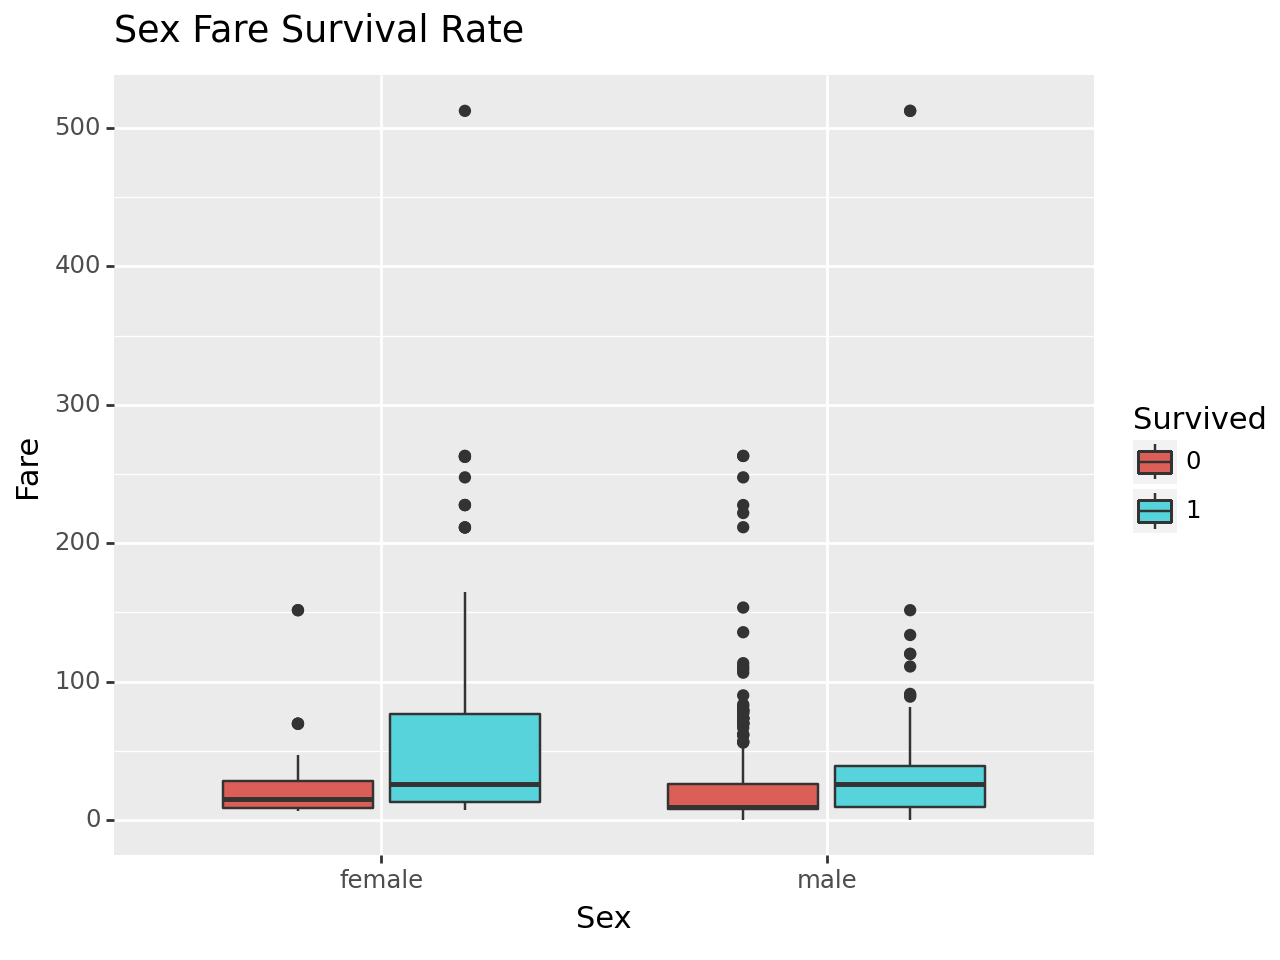

<Figure Size: (640 x 480)>

In [321]:
(ggplot(df_train)
 + aes(x='Sex', y='Fare', fill='Survived')
 + geom_boxplot()
 + ggtitle('Sex Fare Survival Rate')
)

/home/vinicius/.local/lib/python3.10/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 177 rows containing non-finite values.


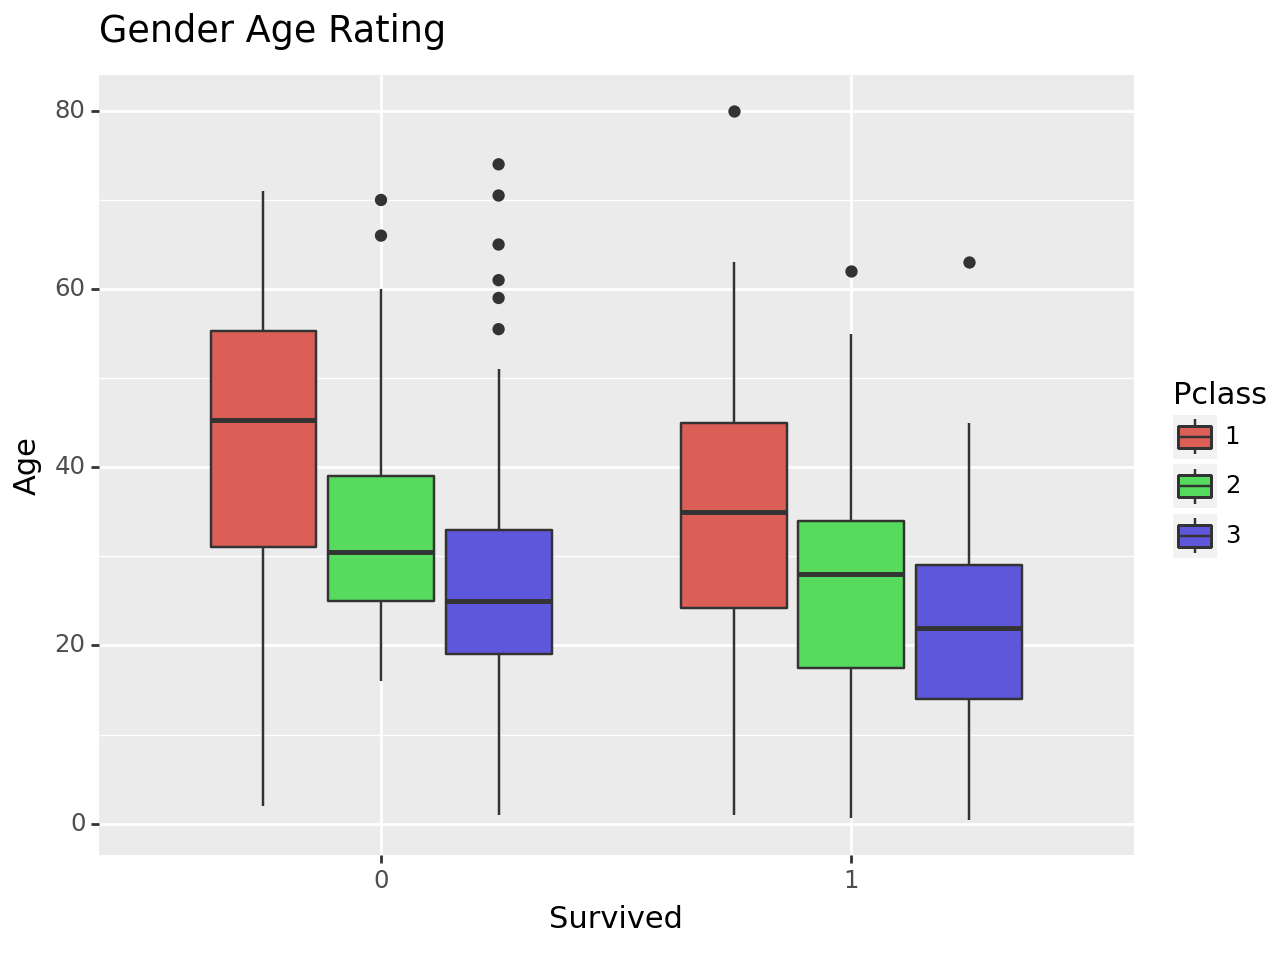

<Figure Size: (640 x 480)>

In [322]:
(ggplot(df_train)
 + aes(x='Survived', y='Age', fill='Pclass')
 + geom_boxplot()
 + ggtitle('Gender Age Rating')
)

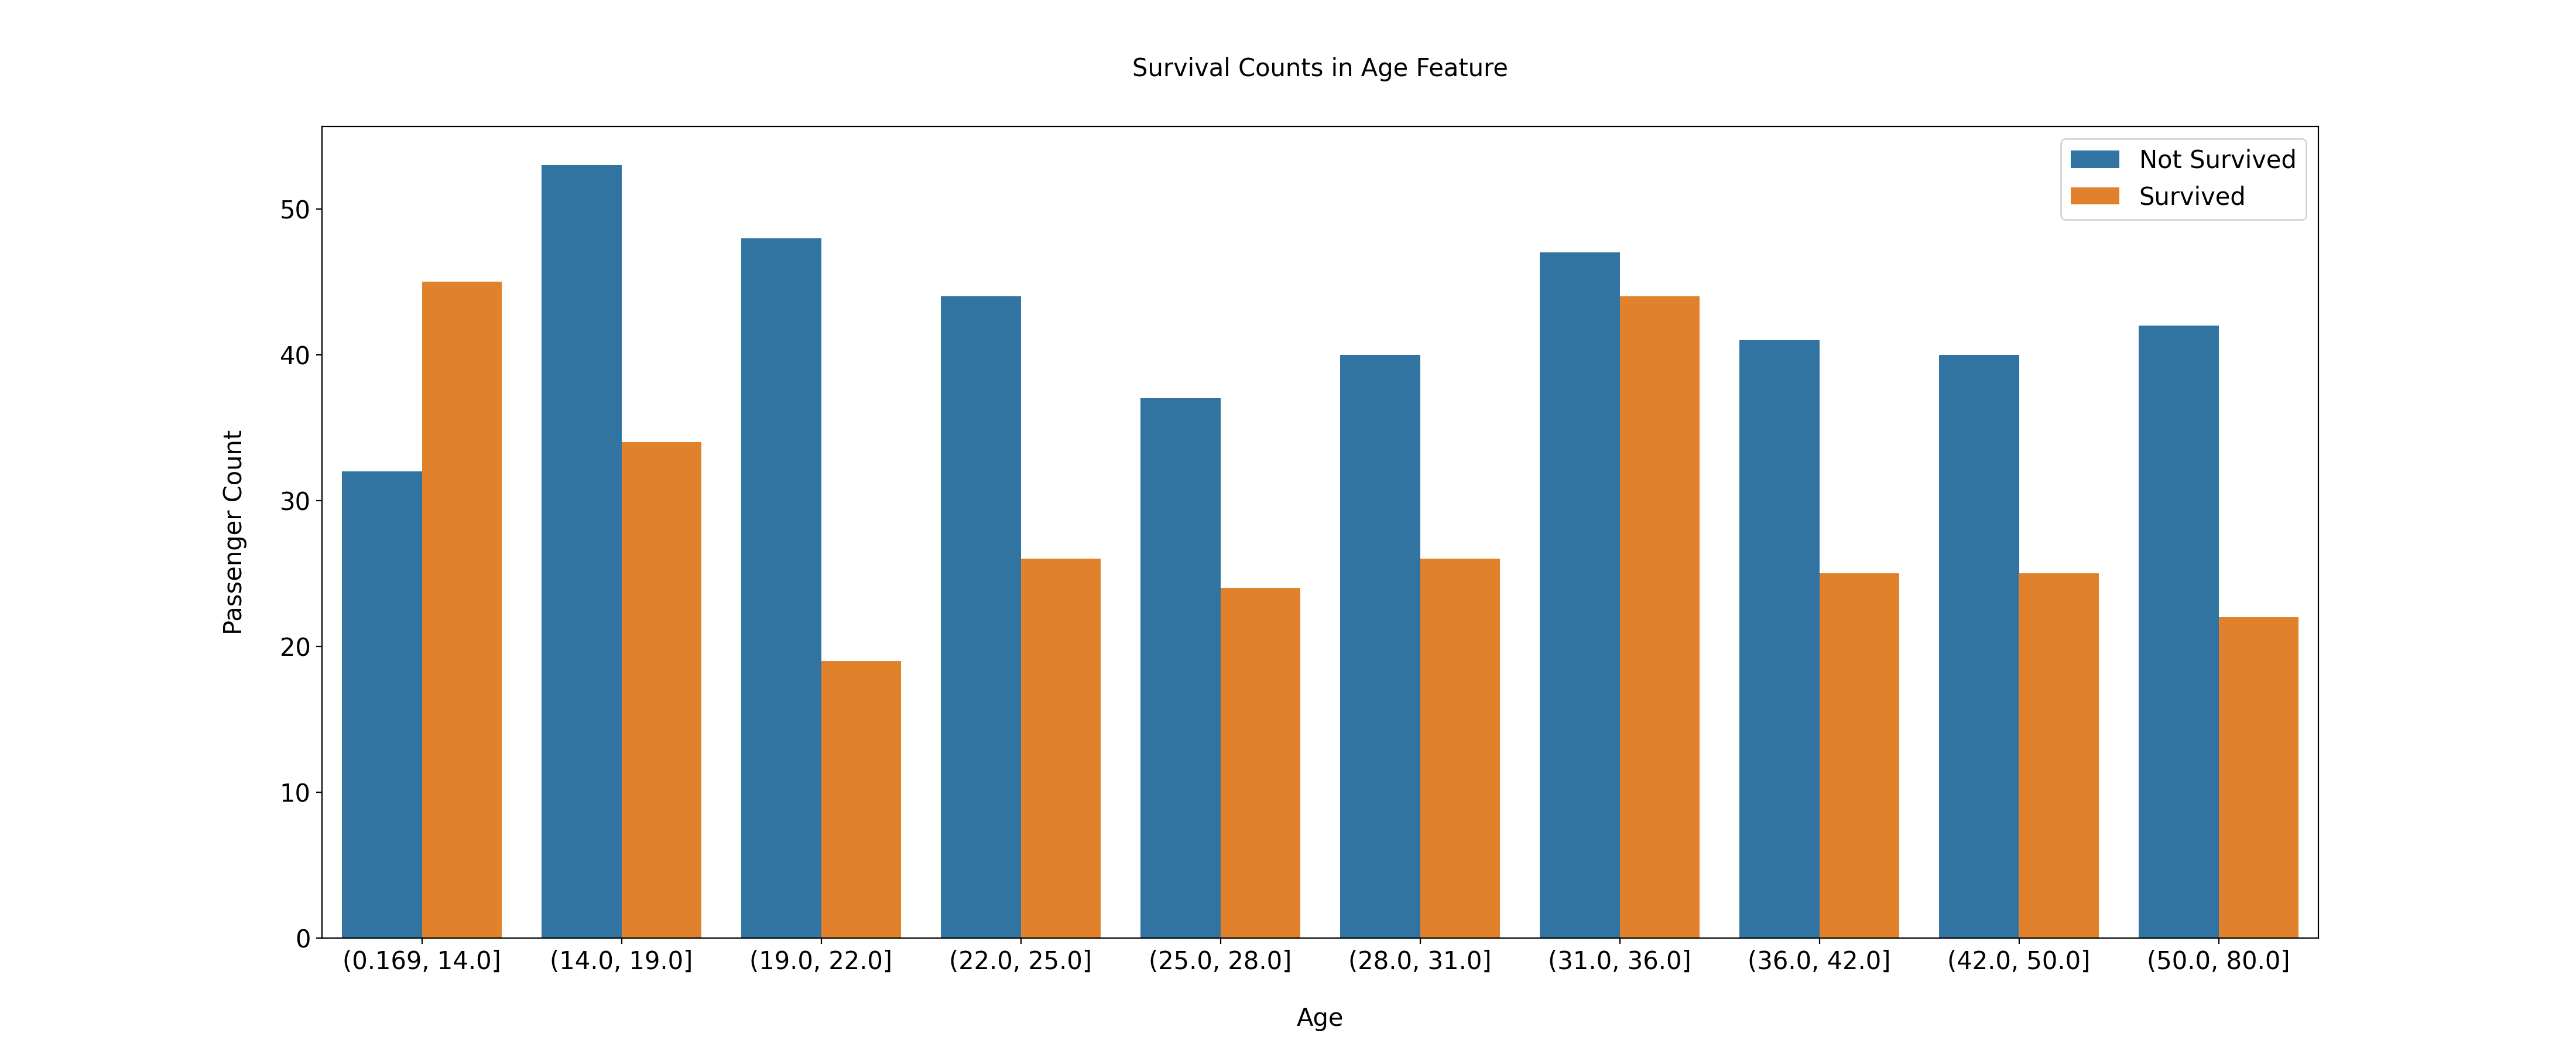

In [323]:
df_all['Age'] = pd.qcut(df_all['Age'], 10)
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Age', hue='Survived', data=df_all)

plt.xlabel('Age', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Survival Counts in {} Feature'.format('Age'), size=15, y=1.05)

plt.show()

In [324]:
print('Passageiro mais velho tinha:',df_train['Age'].max(),'anos')
print('Passageiro mais novo tinha:',df_train['Age'].min(),'anos')
print('Idade média no navio:',df_train['Age'].mean(),'anos')

Passageiro mais velho tinha: 80.0 anos
Passageiro mais novo tinha: 0.42 anos
Idade média no navio: 29.69911764705882 anos


In [325]:
df_train['Initial']=0
for i in df_train:
    df_train['Initial']=df_train.Name.str.extract('([A-Za-z]+)\.')

pd.crosstab(df_train.Initial,df_train.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [326]:
# verificando a idade média por iniciais:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)
df_train.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [327]:
# valores nulos:
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age']=33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age']=36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age']=5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age']=22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age']=46
df_train.Age.isnull().any()

False

In [328]:
print("Train Cabin missing: " + str(df_train.Cabin.isnull().sum()/len(df_train.Cabin)))
print("Test Cabin missing: " + str(df_test.Cabin.isnull().sum()/len(df_test.Cabin)))

Train Cabin missing: 0.7710437710437711
Test Cabin missing: 0.7822966507177034


In [329]:
# Preenche valores nulos das cabines por 'N'
df_all.Cabin.fillna("N", inplace=True)

# Agrupa as cabines de acordo com a letra do nome da cabine
df_all.Cabin = [str(i)[0] for i in df_all.Cabin]



def percent_value_counts(df, feature):
    percent = pd.DataFrame(round(df.loc[:,feature].value_counts(dropna=False, normalize=True)*100,2))
    total = pd.DataFrame(df.loc[:,feature].value_counts(dropna=False))

    total.columns = ["Total"]
    percent.columns = ['Percent']
    return pd.concat([total, percent], axis = 1)

percent_value_counts(df_all, "Cabin")

,Total,Percent
Cabin,,
N,1014,77.46
C,94,7.18
B,65,4.97
D,46,3.51
E,41,3.13
A,22,1.68
F,21,1.60
G,5,0.38
T,1,0.08


In [330]:
df_all.groupby("Cabin")['Fare'].mean().sort_values()

Cabin
G     14.205000
F     18.079367
N     19.132707
T     35.500000
A     41.244314
D     53.007339
E     54.564634
C    107.926598
B    122.383078
Name: Fare, dtype: float64

In [331]:
def cabin_estimator(i):
    a = 0
    if i<16:
        a = "G"
    elif i>=16 and i<27:
        a = "F"
    elif i>=27 and i<38:
        a = "T"
    elif i>=38 and i<47:
        a = "A"
    elif i>= 47 and i<53:
        a = "E"
    elif i>= 53 and i<54:
        a = "D"
    elif i>=54 and i<116:
        a = 'C'
    else:
        a = "B"
    return a

df_all['Cabin'] = df_all.Fare.apply(lambda x: cabin_estimator(x))

percent_value_counts(df_all, "Cabin")


,Total,Percent
Cabin,,
G,714,54.55
F,201,15.36
C,143,10.92
T,109,8.33
B,72,5.50
A,37,2.83
E,27,2.06
D,6,0.46


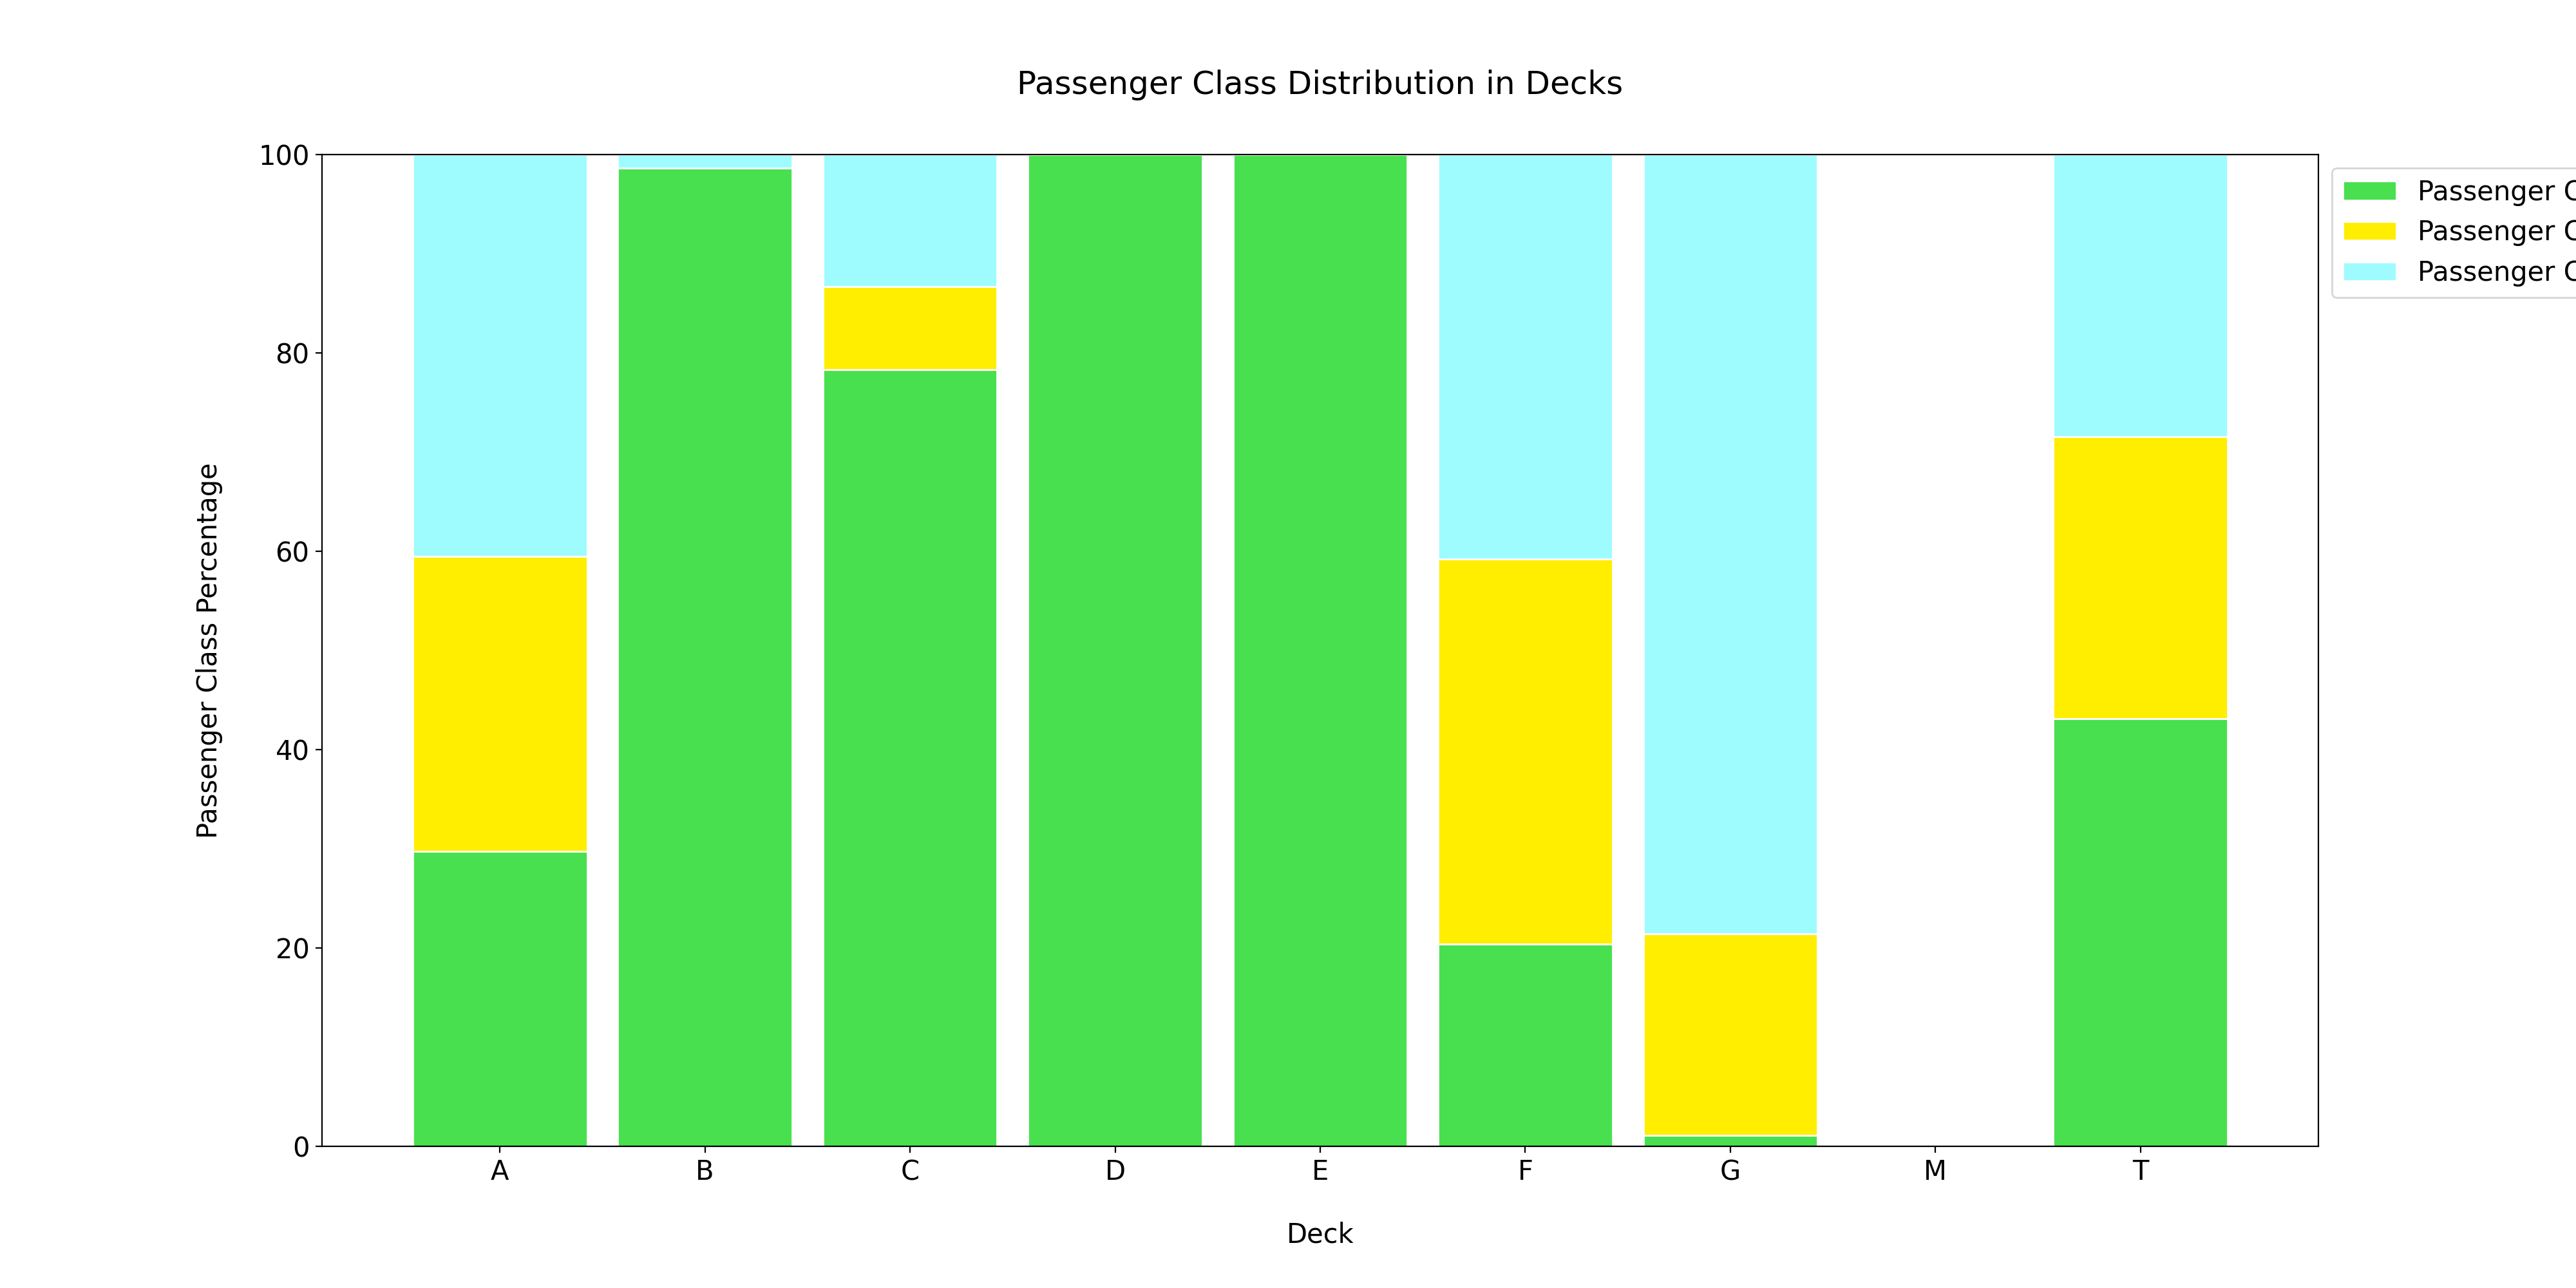

In [345]:
df_all['Deck'] = df_all['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')

df_all_decks = df_all.groupby(['Deck', 'Pclass']).count().drop(columns=['Survived', 'Sex', 'Age', 'SibSp', 'Parch',
                                                                        'Fare', 'Embarked', 'Cabin', 'PassengerId', 'Ticket']).rename(columns={'Name': 'Count'}).transpose()

def get_pclass_dist(df):

    deck_counts = {'A': {}, 'B': {}, 'C': {}, 'D': {}, 'E': {}, 'F': {}, 'G': {}, 'M': {}, 'T': {}}
    decks = df.columns.levels[0]

    for deck in decks:
        for pclass in range(1, 4):
            try:
                count = df[deck][pclass][0]
                deck_counts[deck][pclass] = count
            except KeyError:
                deck_counts[deck][pclass] = 0

    df_decks = pd.DataFrame(deck_counts)
    deck_percentages = {}

    for col in df_decks.columns:
        deck_percentages[col] = [(count / df_decks[col].sum()) * 100 for count in df_decks[col]]

    return deck_counts, deck_percentages

def display_pclass_dist(percentages):

    df_percentages = pd.DataFrame(percentages).transpose()
    deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'M', 'T')
    bar_count = np.arange(len(deck_names))
    bar_width = 0.85

    pclass1 = df_percentages[0]
    pclass2 = df_percentages[1]
    pclass3 = df_percentages[2]

    plt.figure(figsize=(20, 10))
    plt.bar(bar_count, pclass1, color='#48E04F', edgecolor='white', width=bar_width, label='Passenger Class 1')
    plt.bar(bar_count, pclass2, bottom=pclass1, color='#FFEE00', edgecolor='white', width=bar_width, label='Passenger Class 2')
    plt.bar(bar_count, pclass3, bottom=pclass1 + pclass2, color='#9EFCFF', edgecolor='white', width=bar_width, label='Passenger Class 3')

    plt.xlabel('Deck', size=15, labelpad=20)
    plt.ylabel('Passenger Class Percentage', size=15, labelpad=20)
    plt.xticks(bar_count, deck_names)
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)

    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 15})
    plt.title('Passenger Class Distribution in Decks', size=18, y=1.05)

    plt.show()

all_deck_count, all_deck_per = get_pclass_dist(df_all_decks)
display_pclass_dist(all_deck_per)

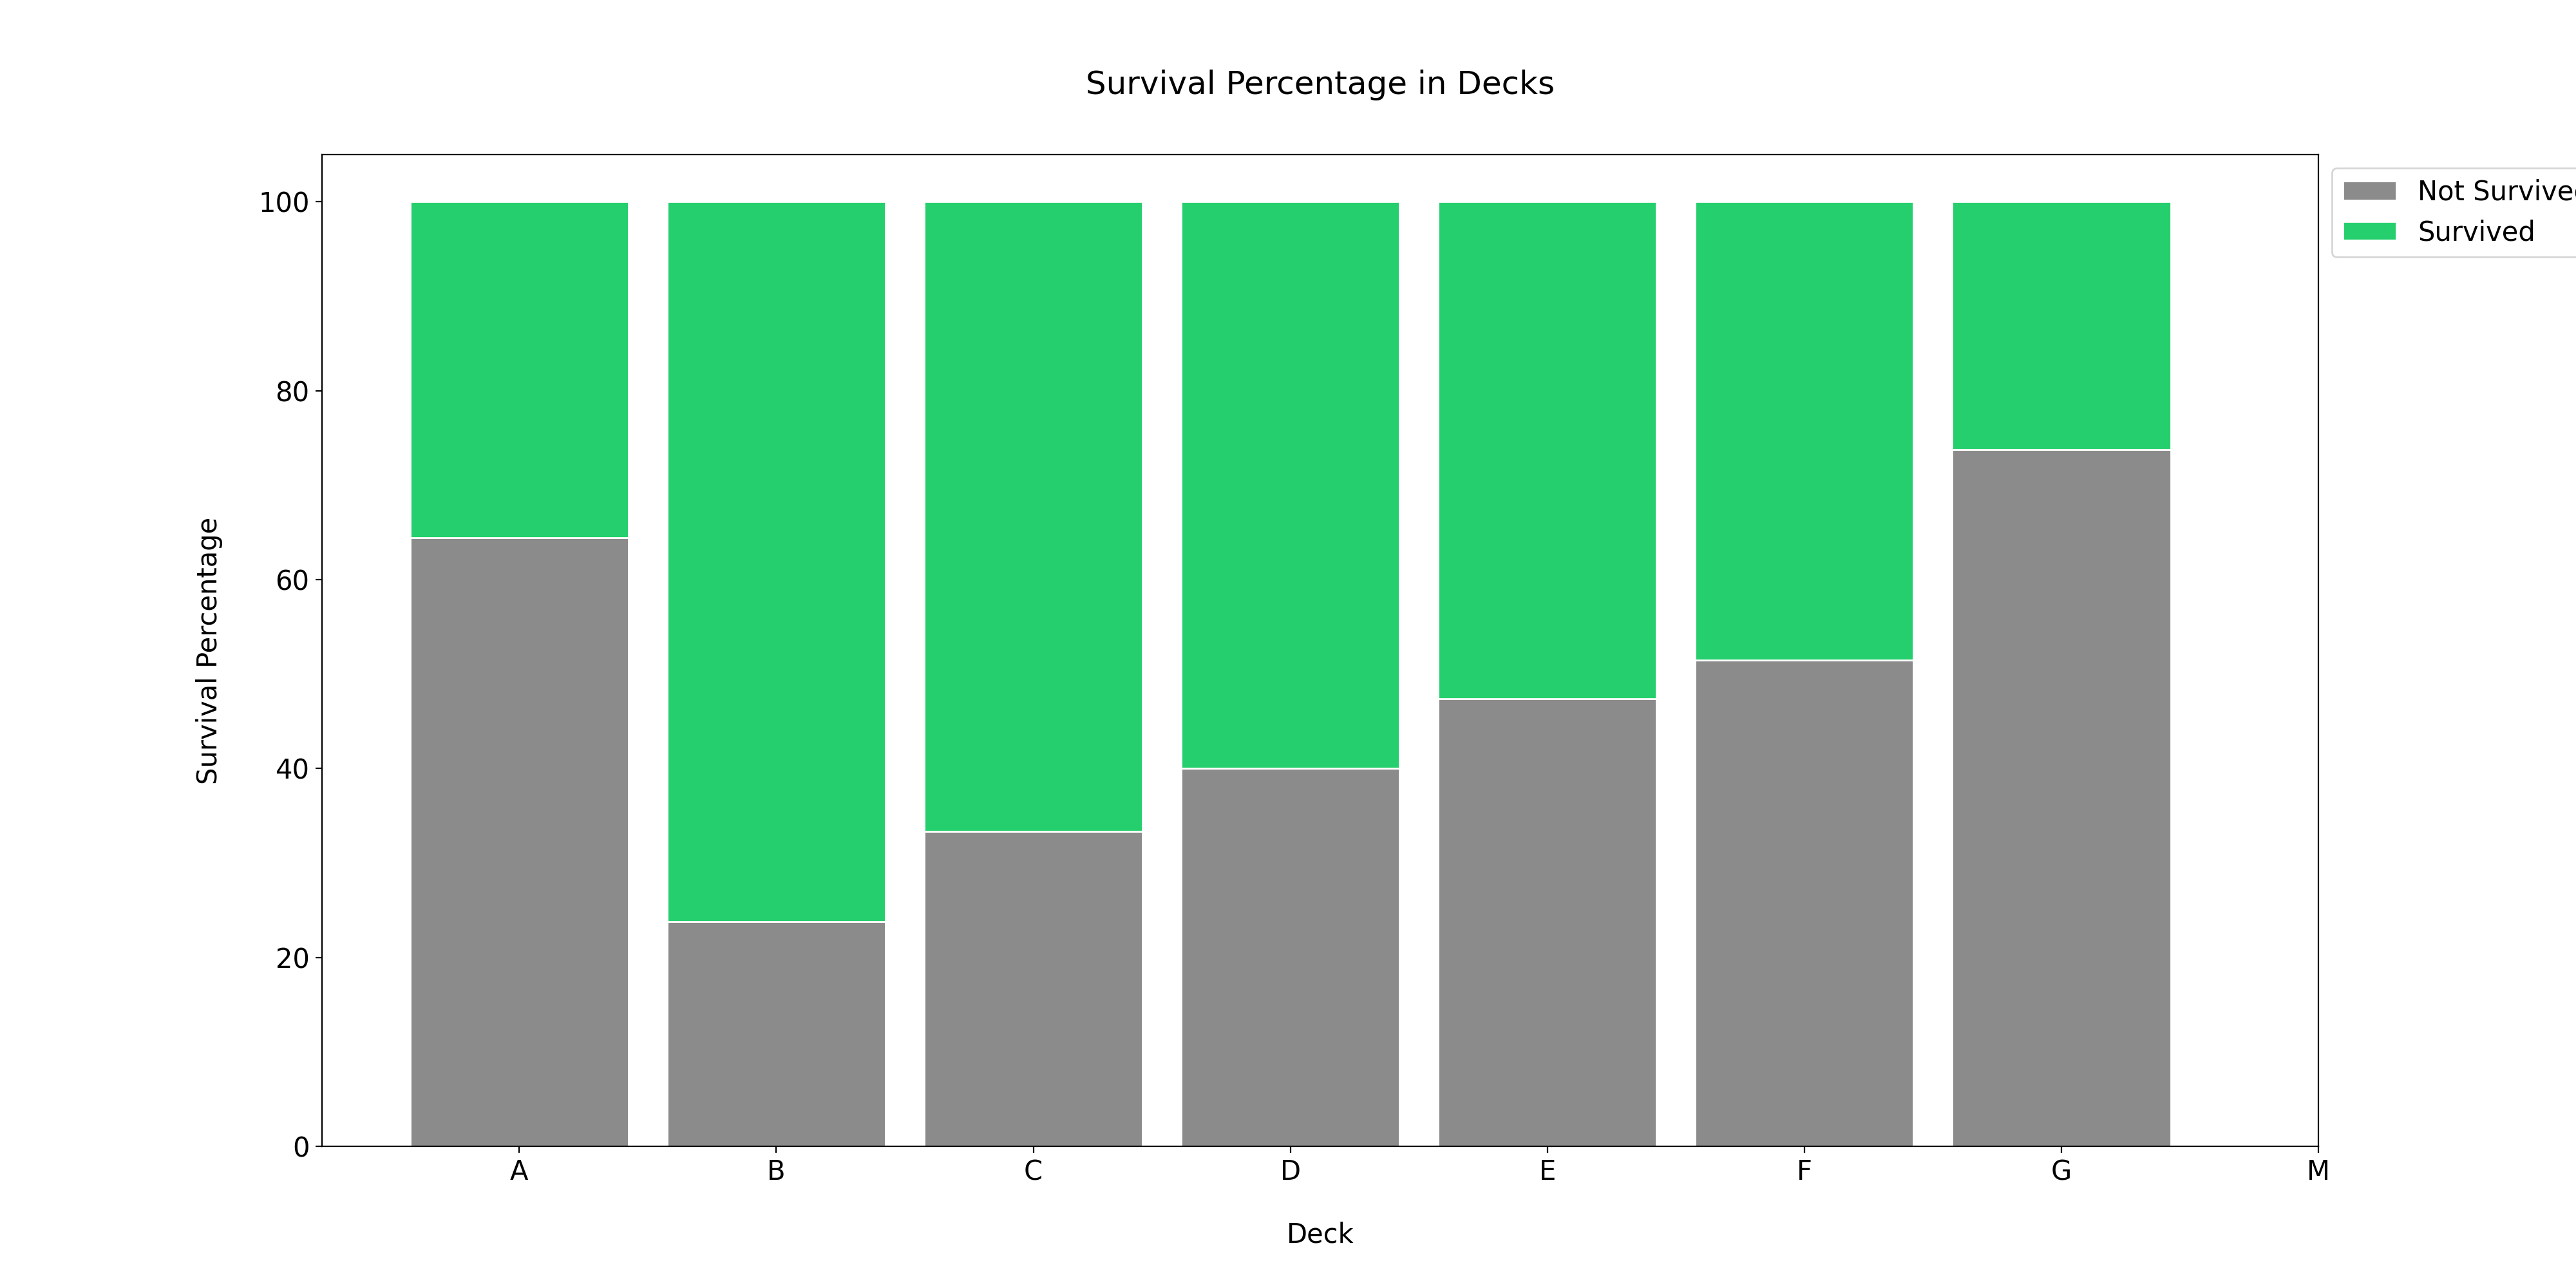

In [346]:
idx = df_all[df_all['Deck'] == 'T'].index
df_all.loc[idx, 'Deck'] = 'A'

df_all_decks_survived = df_all.groupby(['Deck', 'Survived']).count().drop(columns=['Sex', 'Age', 'SibSp', 'Parch', 'Fare',
                                                                                   'Embarked', 'Pclass', 'Cabin', 'PassengerId', 'Ticket']).rename(columns={'Name':'Count'}).transpose()

def get_survived_dist(df):

    surv_counts = {'A':{}, 'B':{}, 'C':{}, 'D':{}, 'E':{}, 'F':{}, 'G':{}, 'M':{}}
    decks = df.columns.levels[0]

    for deck in decks:
        for survive in range(0, 2):
            surv_counts[deck][survive] = df[deck][survive][0]

    df_surv = pd.DataFrame(surv_counts)
    surv_percentages = {}

    for col in df_surv.columns:
        surv_percentages[col] = [(count / df_surv[col].sum()) * 100 for count in df_surv[col]]

    return surv_counts, surv_percentages

def display_surv_dist(percentages):

    df_survived_percentages = pd.DataFrame(percentages).transpose()
    deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'M')
    bar_count = np.arange(len(deck_names))
    bar_width = 0.85

    not_survived = df_survived_percentages[0]
    survived = df_survived_percentages[1]

    plt.figure(figsize=(20, 10))
    plt.bar(bar_count, not_survived, color='#8B8B8B', edgecolor='white', width=bar_width, label="Not Survived")
    plt.bar(bar_count, survived, bottom=not_survived, color='#26CF6D', edgecolor='white', width=bar_width, label="Survived")

    plt.xlabel('Deck', size=15, labelpad=20)
    plt.ylabel('Survival Percentage', size=15, labelpad=20)
    plt.xticks(bar_count, deck_names)
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)

    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 15})
    plt.title('Survival Percentage in Decks', size=18, y=1.05)

    plt.show()

all_surv_count, all_surv_per = get_survived_dist(df_all_decks_survived)
display_surv_dist(all_surv_per)

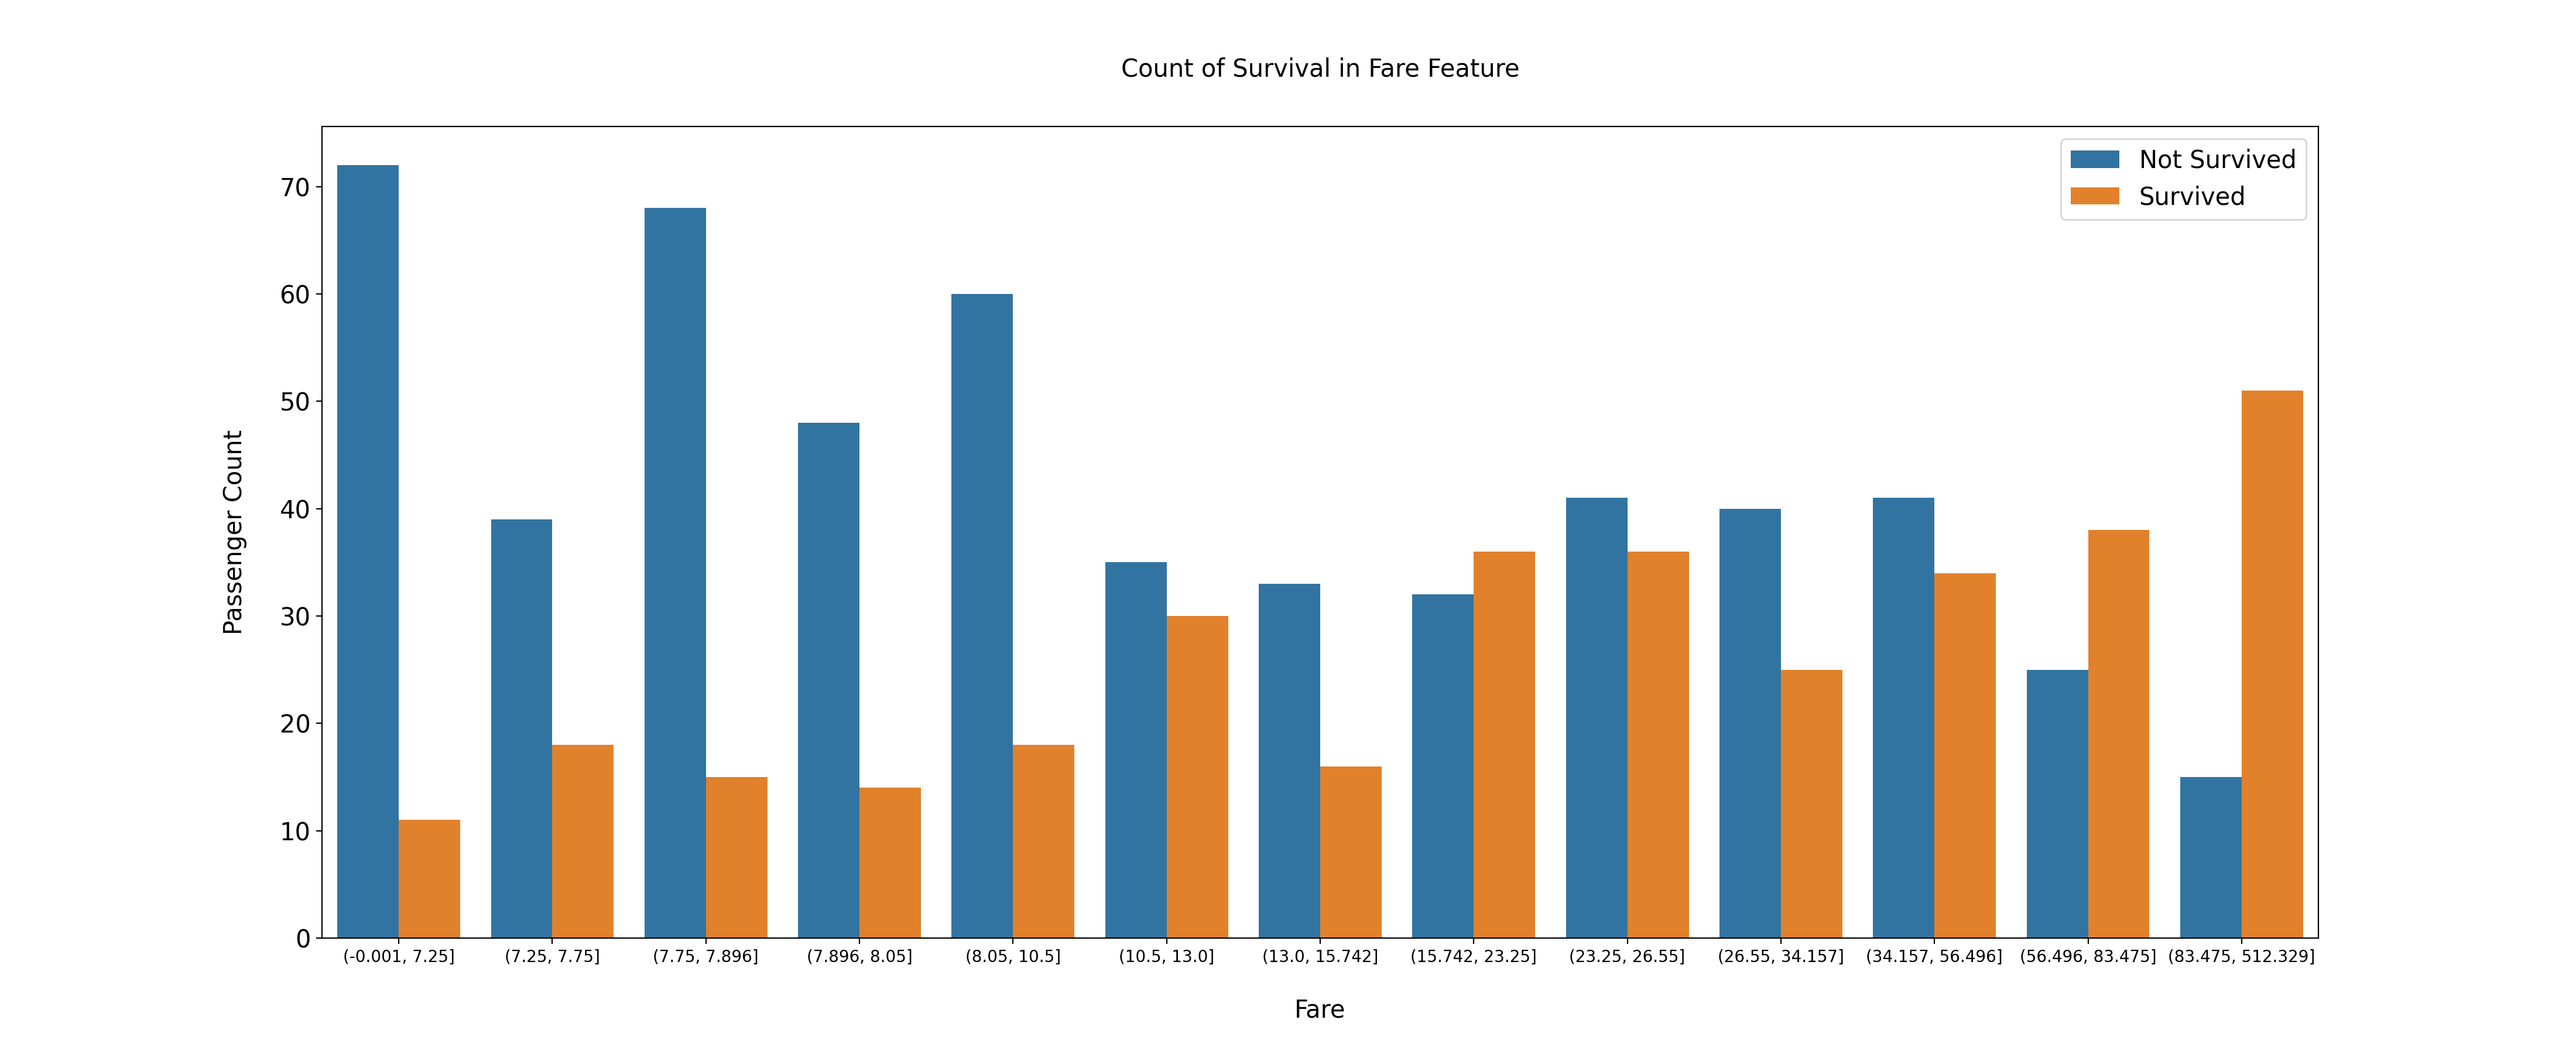

In [334]:
df_all['Fare'] = pd.qcut(df_all['Fare'], 13)
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Fare', hue='Survived', data=df_all)

plt.xlabel('Fare', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Fare'), size=15, y=1.05)

plt.show()

In [335]:
df_train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [336]:
df_train[df_train.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs


In [337]:
df_train['Embarked'].fillna('C', inplace = True)
# df_train['Embarked'].value_counts()

# groupby(['Embarked'], as_index=False)

df_train.loc[(df_train['Survived'] == 1),['Survived','Embarked']].value_counts()
# df_train[['Embarked', 'Survived']].value_counts().mean()

Survived  Embarked
1         S           217
          C            95
          Q            30
Name: count, dtype: int64

In [338]:
pd.crosstab([df_train.Embarked,df_train.Pclass],[df_train.Sex,df_train.Survived],margins=True).style.background_gradient(cmap='summer_r')

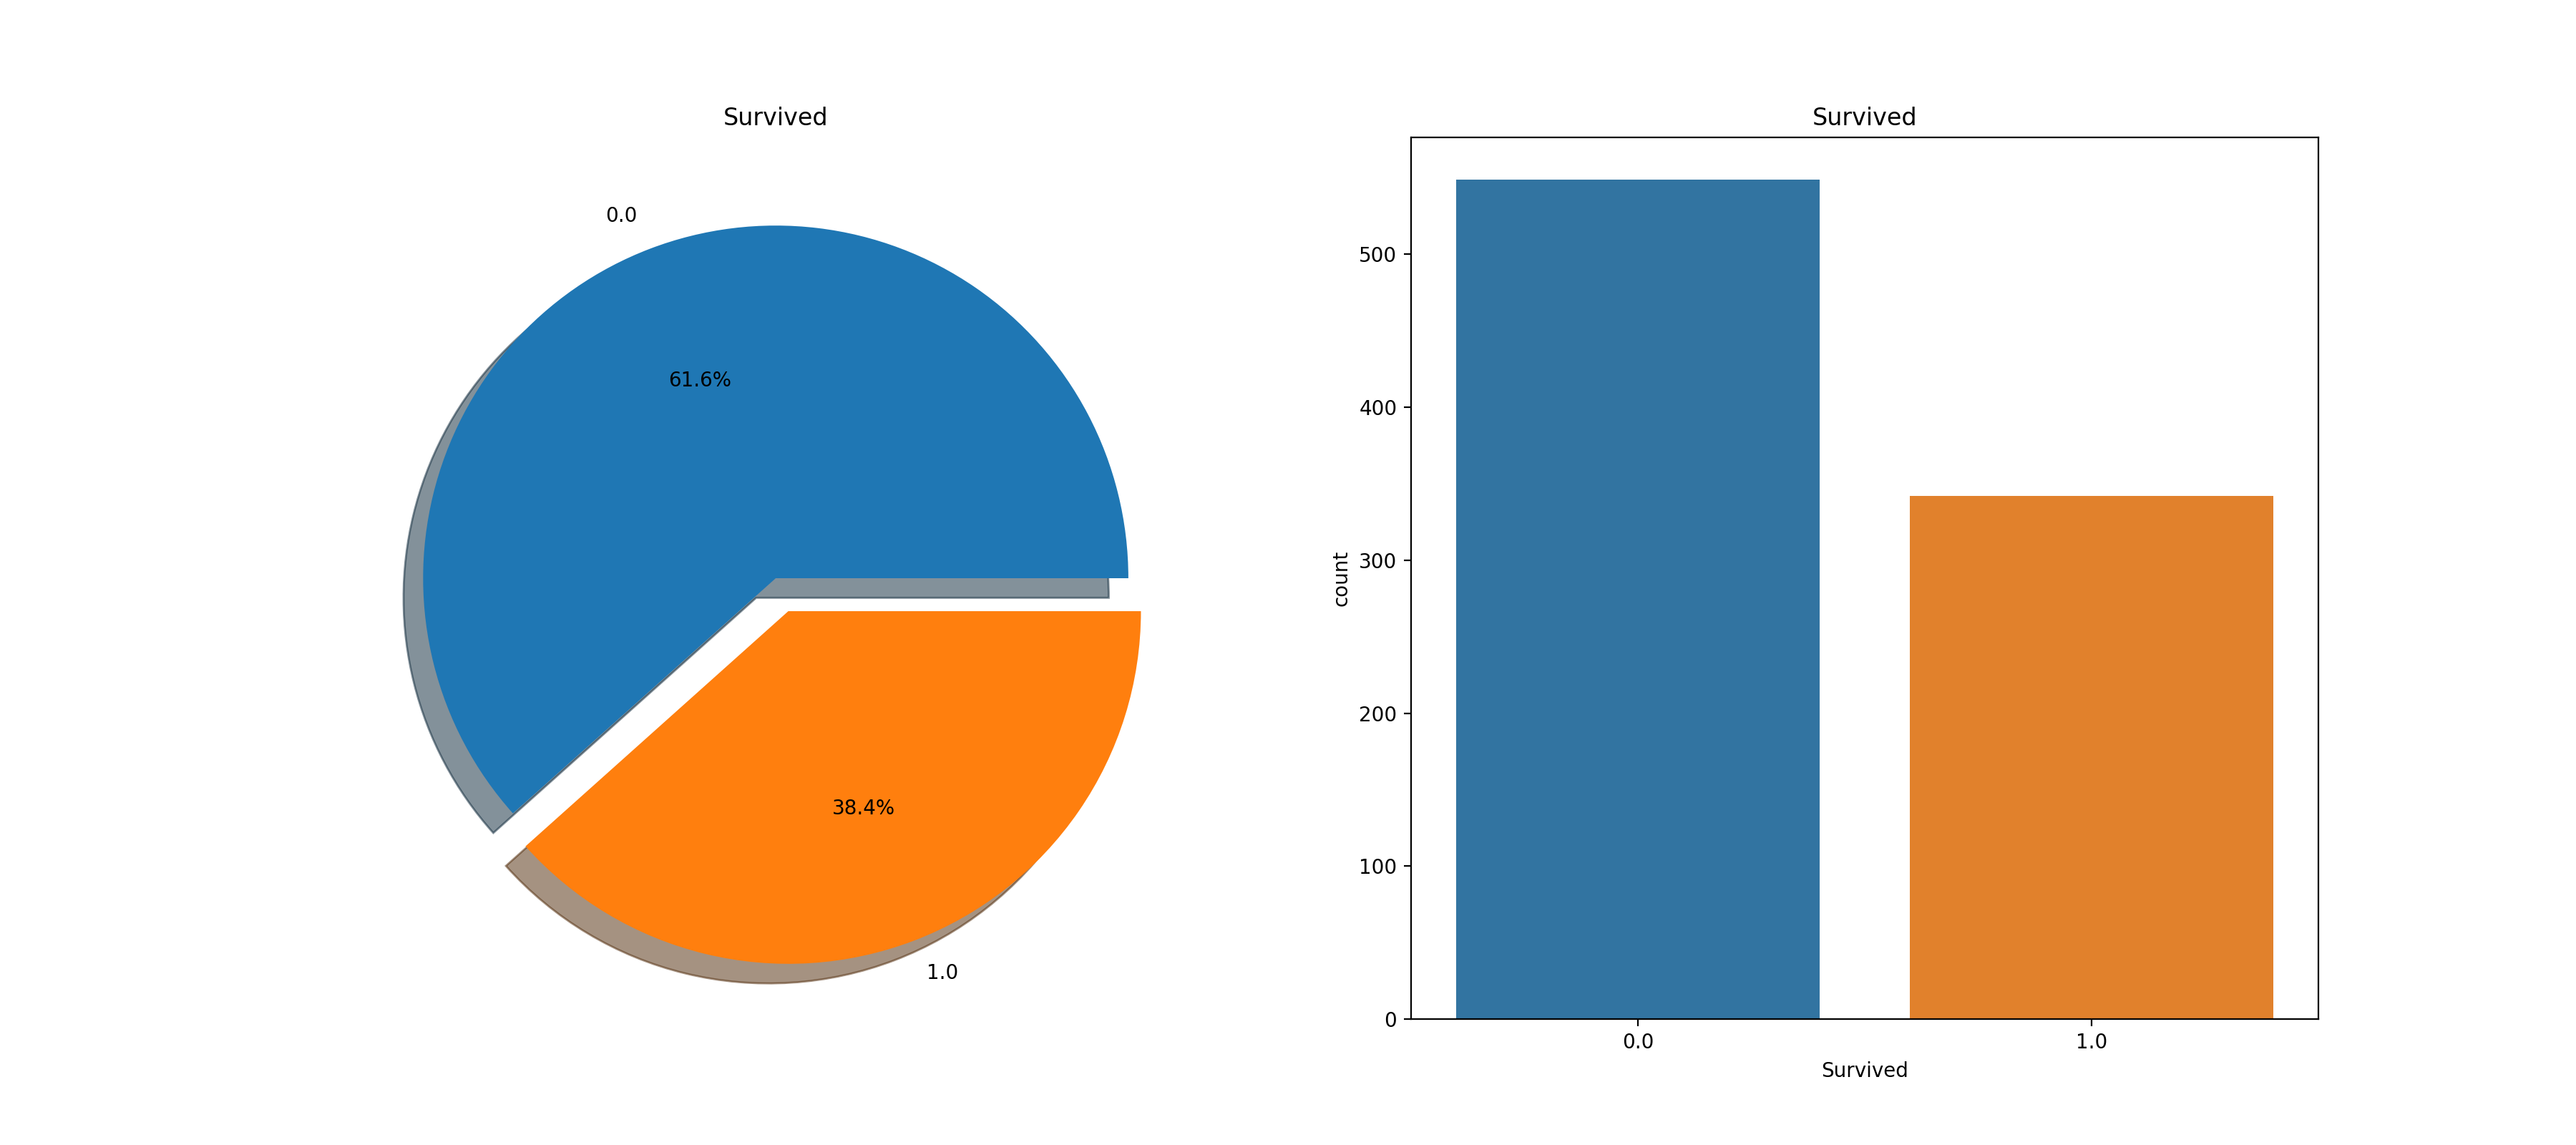

In [339]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_all['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived', data=df_all, ax=ax[1])
ax[1].set_title('Survived')
plt.show()
     


In [340]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Carregar os dados de treinamento
train_data = pd.read_csv('./train-1.csv')

# Selecionar as características relevantes
relevant_features = ['Age', 'Fare', 'Pclass']
X_train = train_data[relevant_features]
y_train = train_data['Survived']

# Tratar valores ausentes
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

# Treinar o modelo
model = RandomForestClassifier()
model.fit(X_train_imputed, y_train)

# Carregar os dados de teste
test_data = pd.read_csv('./test-1.csv')

# Selecionar as características relevantes
X_test = test_data[relevant_features]

# Tratar valores ausentes
X_test_imputed = imputer.transform(X_test)

# Fazer previsões
predictions = model.predict(X_test_imputed)

# Criar dataframe com as previsões
passenger_ids = test_data['PassengerId']
df_predictions = pd.DataFrame({'Passageiro': passenger_ids, 'Sobreviveu': predictions})

# Exibir o dataframe com as previsões
print(df_predictions)

     Passageiro  Sobreviveu
0           892           0
1           893           0
2           894           1
3           895           1
4           896           0
..          ...         ...
413        1305           0
414        1306           1
415        1307           0
416        1308           0
417        1309           1

[418 rows x 2 columns]


### Conclusão

É amplamente reconhecido que o Titanic foi um dos, se não o mais famoso barco do mundo. Esse imenso transatlântico britânico tornou-se conhecido em sua época por ser considerado "inafundável". No entanto, logo em sua primeira viagem, colidiu com um iceberg e teve um fim trágico.

Esta análise leva em consideração diversos aspectos, como gênero, idade e classe social, a fim de compreender melhor quem sobreviveu e por que - apesar da sorte - nesse incidente.

Ao analisarmos os dados, observamos que apenas cerca de 3% das mulheres da primeira classe perderam suas vidas, enquanto na terceira classe a porcentagem de mulheres mortas foi de 54%. Em relação às crianças, descobrimos que 5 das 6 crianças da primeira classe foram salvas, enquanto na terceira classe, 52 das 79 crianças tiveram suas vidas ceifadas. Quando consideramos o gênero, os dados são ainda mais divergentes, pois praticamente todas as mulheres da primeira e segunda classe foram salvas. Por outro lado, os homens, inclusive os da primeira classe, tiveram uma taxa de mortalidade ainda maior do que as mulheres da terceira classe. Isso resulta em 50% das crianças, 20% dos homens e 75% das mulheres sobreviventes.